# Connecting libraries

In [1]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_rows', 50)
import matplotlib.pyplot as plt
import seaborn
import missingno as msno

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression       
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Loading the dataset

##### The prediction task is to determine whether a person makes over $50K a year

In [3]:
dataset = pd.read_csv("_datasets/adult.csv")
dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Dataset info

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
dataset.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
dataset.duplicated().sum()

52

In [29]:
dataset[dataset.duplicated()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46665,20,?,203353,Some-college,10,Never-married,?,Own-child,White,Female,0,0,40,United-States,<=50K
46979,22,?,334593,Some-college,10,Never-married,?,Not-in-family,White,Male,0,0,40,United-States,<=50K
47126,46,Private,133616,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48274,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K


In [8]:
dataset.isna().sum(axis = 0)  

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

<Axes: >

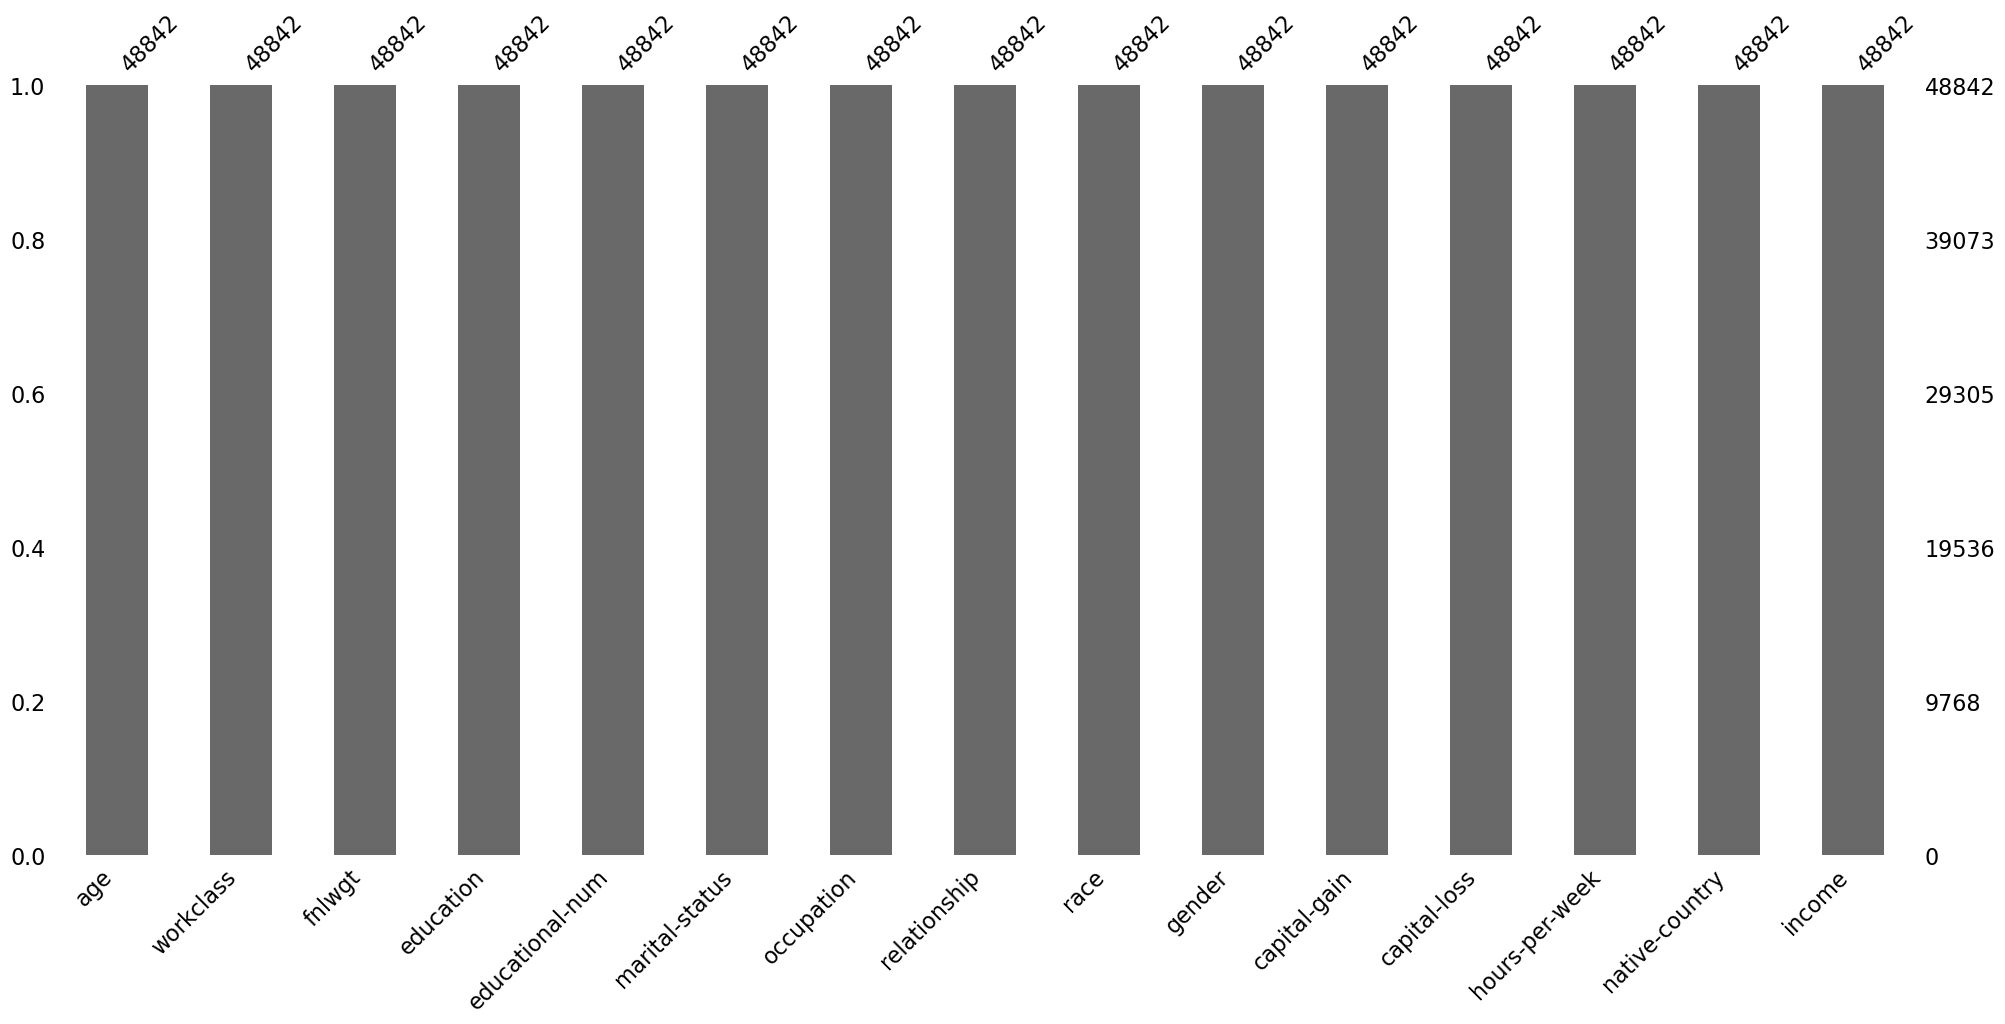

In [9]:
msno.bar(dataset)

In [10]:
dataset.mode()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,36,Private,203488,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K


In [11]:
dataset['age'].unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86], dtype=int64)

In [12]:
dataset['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [13]:
print(len(dataset['fnlwgt'].unique()))
dataset['fnlwgt'].unique()

28523


array([226802,  89814, 336951, ..., 129912, 255835, 257302], dtype=int64)

In [14]:
dataset['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [15]:
dataset['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1],
      dtype=int64)

In [16]:
dataset['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [17]:
dataset['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [18]:
dataset['relationship'].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [19]:
dataset['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [20]:
dataset['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [21]:
dataset['capital-gain'].unique()

array([    0,  7688,  3103,  6418,  7298,  3908, 14084,  5178, 15024,
       99999,  2597,  2907,  4650,  6497,  1055,  5013, 27828,  4934,
        4064,  3674,  2174, 10605,  3418,   114,  2580,  3411,  4508,
        4386,  8614, 13550,  6849,  2463,  3137,  2885,  2964,  1471,
       10566,  2354,  1424,  1455,  3325,  4416, 25236,   594,  2105,
        4787,  2829,   401,  4865,  1264,  1506, 10520,  3464,  2653,
       20051,  4101,  1797,  2407,  3471,  1086,  1848, 14344,  1151,
        2993,  2290, 15020,  9386,  2202,  3818,  2176,  5455, 11678,
        7978,  7262,  6514, 41310,  3456,  7430,  2414,  2062, 34095,
        1831,  6723,  5060, 15831,  2977,  2346,  3273,  2329,  9562,
        2635,  4931,  1731,  6097,   914,  7896,  5556,  1409,  3781,
        3942,  2538,  3887, 25124,  7443,  5721,  1173,  4687,  6612,
        6767,  2961,   991,  2036,  2936,  2050,  1111,  2228, 22040,
        3432,  6360,  2009,  1639, 18481,  2387], dtype=int64)

In [22]:
dataset['capital-loss'].unique()

array([   0, 1721, 1876, 2415, 1887,  625, 1977, 2057, 1429, 1590, 1485,
       2051, 2377, 1672, 1628, 1902, 1602, 1741, 2444, 1408, 2001, 2042,
       1740, 1825, 1848, 1719, 3004, 2179, 1573, 2205, 1258, 2339, 1726,
       2258, 1340, 1504, 2559, 1668, 1974, 1980, 1564, 2547, 2002, 1669,
       1617,  323, 3175, 2472, 2174, 1579, 2129, 1510, 1735, 2282, 1870,
       1411, 1911, 1651, 1092, 1762, 2457, 2231, 2238,  653, 1138, 2246,
       2603, 2392, 1944, 1380, 2465, 1421, 3770, 1594,  213, 2149, 2824,
       1844, 2467, 2163, 1816, 1648, 2206, 2352,  419, 1539,  880,  810,
        974, 4356, 2489, 1755, 3683, 2267, 2080,  155, 3900, 2201, 2754],
      dtype=int64)

In [23]:
dataset['hours-per-week'].unique()

array([40, 50, 30, 32, 10, 39, 35, 48, 25, 20, 45, 47,  6, 43, 90, 54, 60,
       38, 36, 18, 24, 44, 56, 28, 16, 41, 22, 55, 14, 33, 37,  8, 12, 70,
       15, 75, 52, 84, 42, 80, 68, 99, 65,  5, 17, 72, 53, 29, 96, 21, 46,
        3,  1, 23, 49, 67, 76,  7,  2, 58, 26, 34,  4, 51, 78, 63, 31, 92,
       77, 27, 85, 13, 19, 98, 62, 66, 57, 11, 86, 59,  9, 64, 73, 61, 88,
       79, 89, 74, 69, 87, 97, 94, 82, 91, 81, 95], dtype=int64)

In [24]:
dataset['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [25]:
dataset['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [26]:
dataset[dataset['workclass'] == '?']

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
48812,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [27]:
dataset[dataset['occupation'] == '?']

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
48812,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


# Diagrams of distributions

## Genders proportion

<Axes: xlabel='gender', ylabel='Count'>

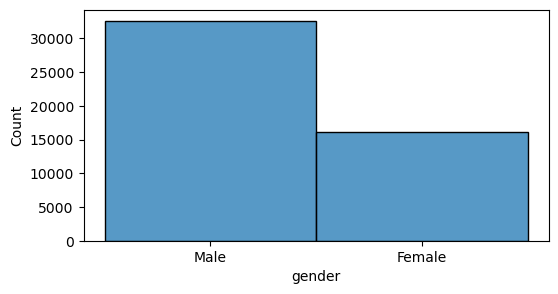

In [29]:
plt.figure(figsize = (6, 3))
seaborn.histplot(dataset['gender'])

## Income classes proportion

<Axes: xlabel='income', ylabel='Count'>

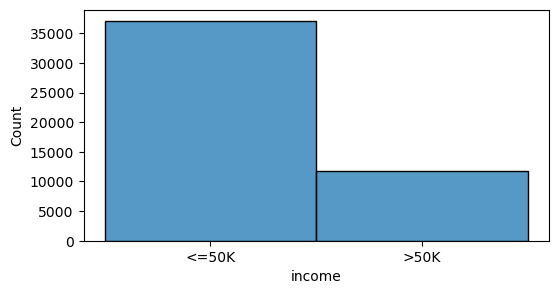

In [30]:
plt.figure(figsize = (6, 3))
seaborn.histplot(dataset['income'])

## Income by age

<Axes: xlabel='age', ylabel='Count'>

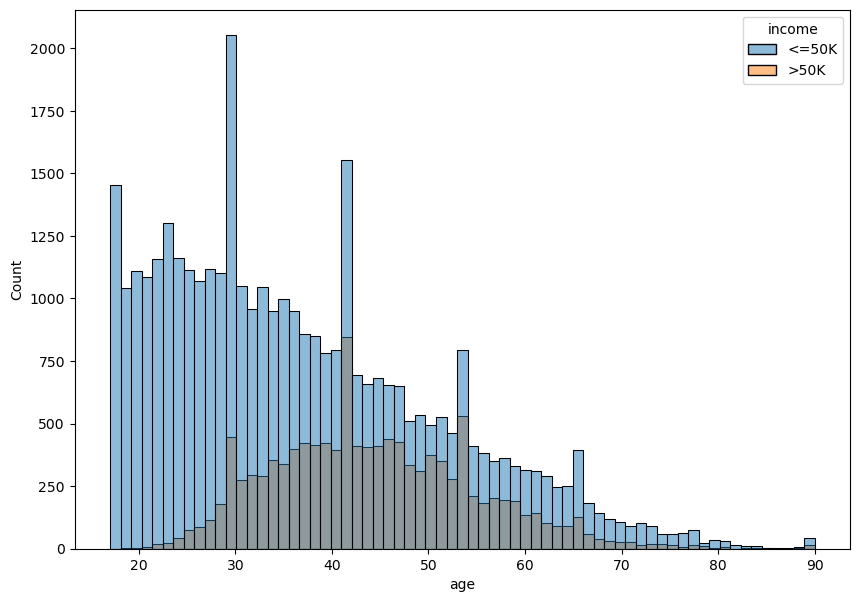

In [31]:
plt.figure(figsize = (10, 7))
seaborn.histplot(data = dataset[['age', 'income']], x = 'age', hue = 'income')

<Axes: xlabel='income', ylabel='age'>

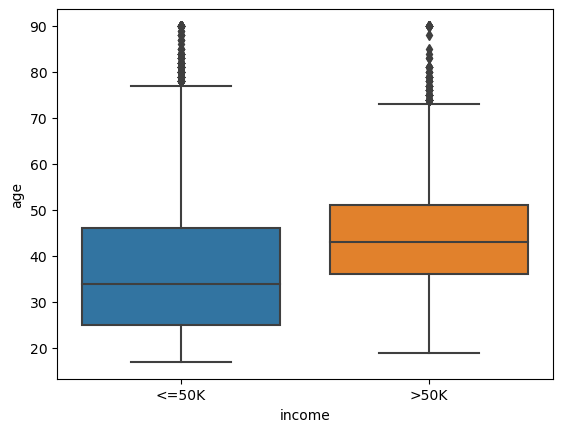

In [32]:
seaborn.boxplot(dataset, x = 'income', y = 'age')

<Axes: xlabel='income', ylabel='age'>

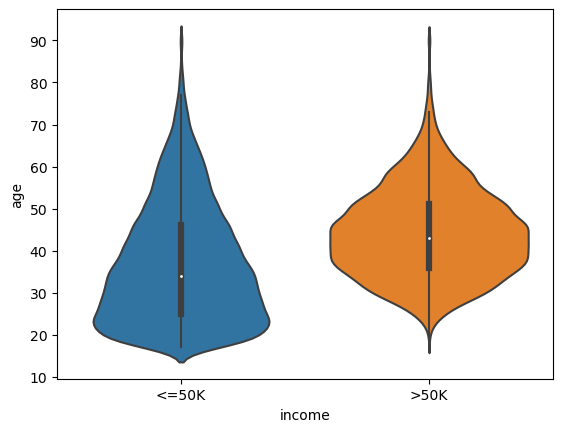

In [33]:
seaborn.violinplot(dataset, x = 'income', y = 'age')

## Income by native country

<Axes: xlabel='native-country', ylabel='Count'>

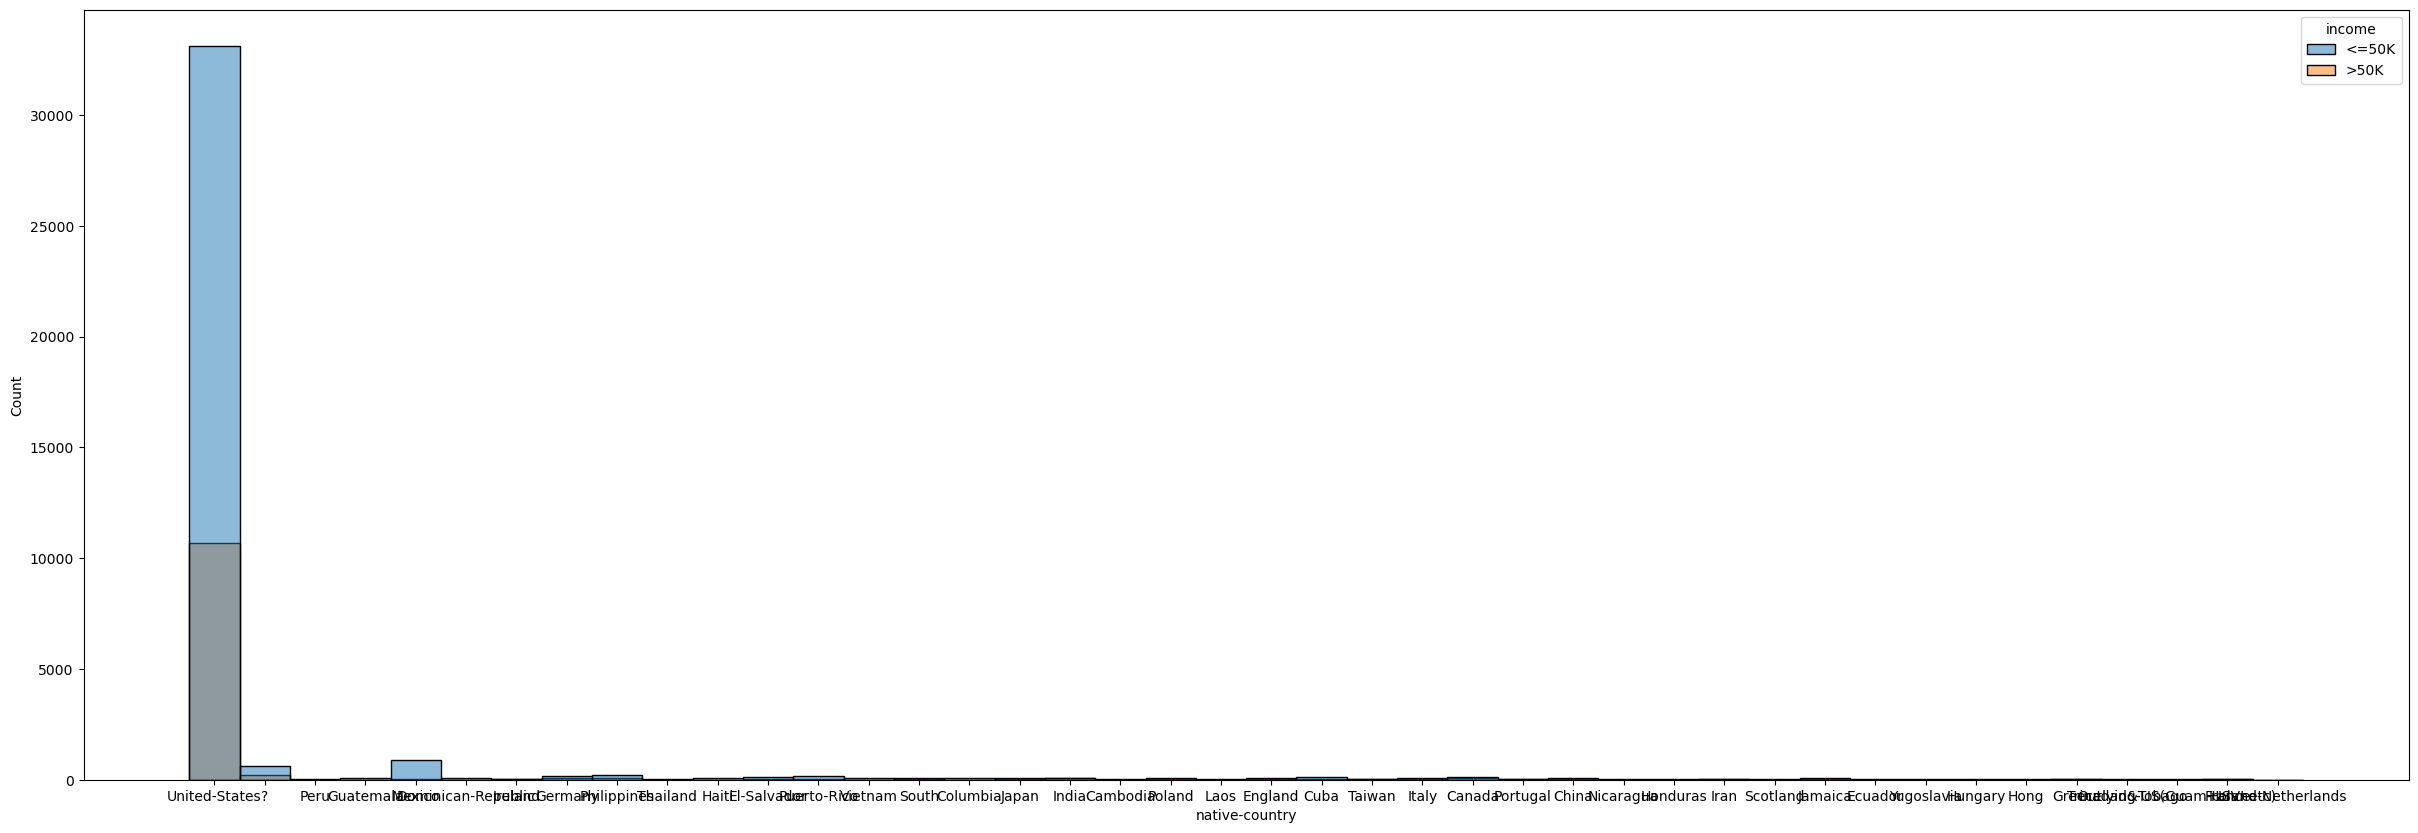

In [34]:
plt.figure(figsize = (30, 10))
seaborn.histplot(data = dataset[['native-country', 'income']], x = 'native-country', hue = 'income')

## Income by relationship status

<Axes: xlabel='relationship', ylabel='Count'>

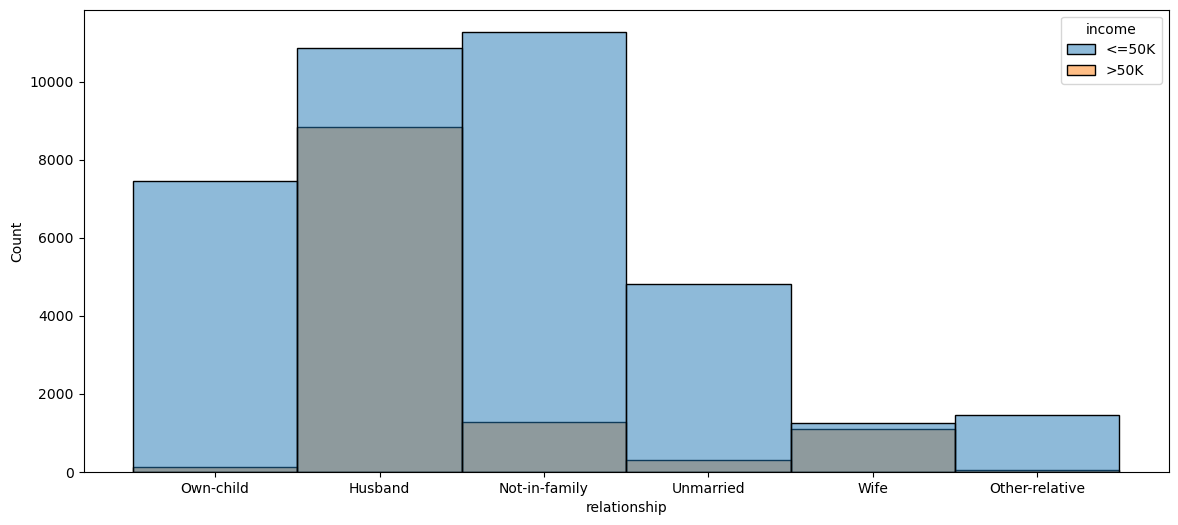

In [35]:
plt.figure(figsize = (14, 6))
seaborn.histplot(data = dataset[['relationship', 'income']], x = 'relationship', hue = 'income', discrete = True)

## Income by marital status

<Axes: xlabel='marital-status', ylabel='Count'>

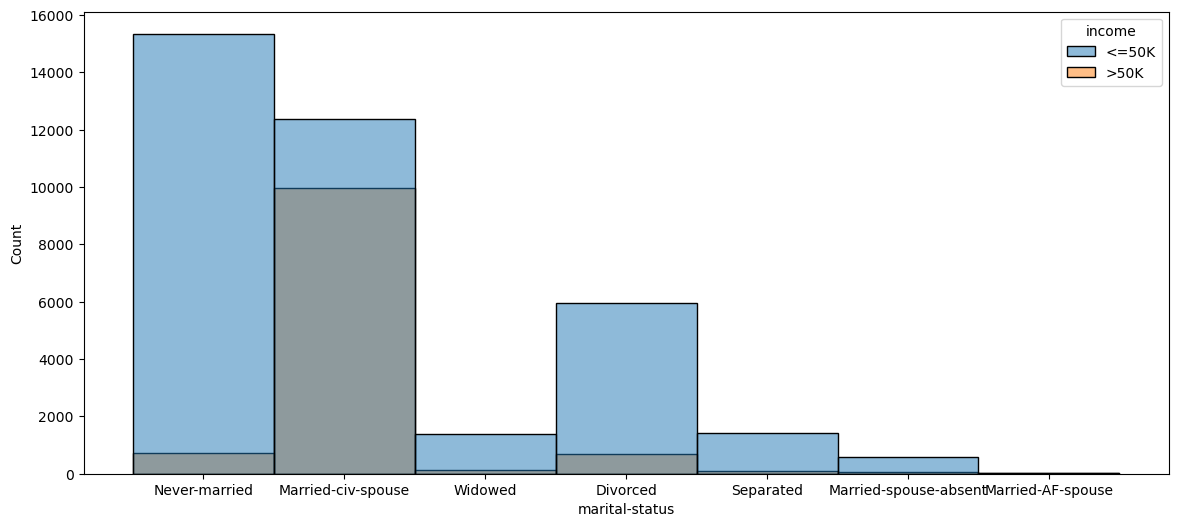

In [36]:
plt.figure(figsize = (14, 6))
seaborn.histplot(data = dataset[['marital-status', 'income']], x = 'marital-status', hue = 'income', discrete = True)

## Income by level of education

<Axes: xlabel='educational-num', ylabel='Count'>

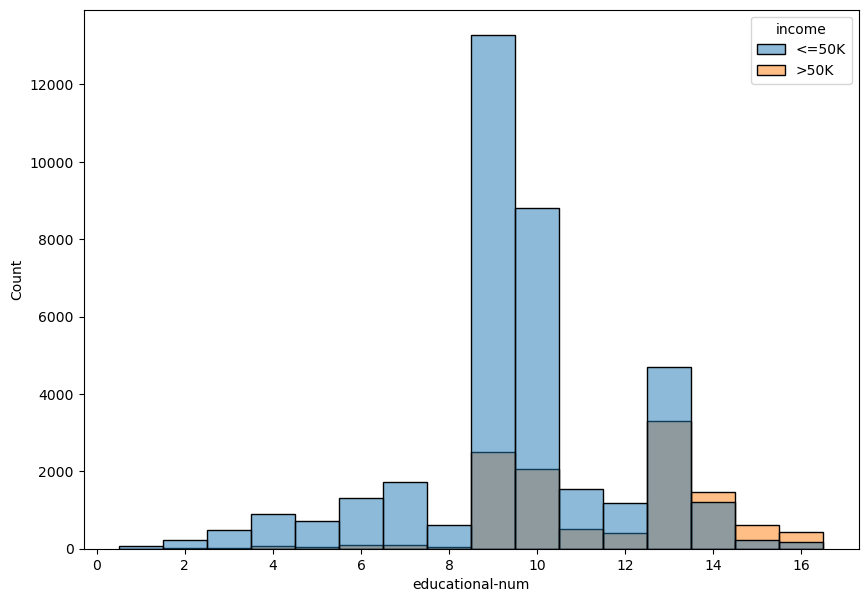

In [37]:
plt.figure(figsize = (10, 7))
seaborn.histplot(data = dataset[['educational-num', 'income']], x = 'educational-num', hue = 'income', discrete = True)

<Axes: xlabel='income', ylabel='educational-num'>

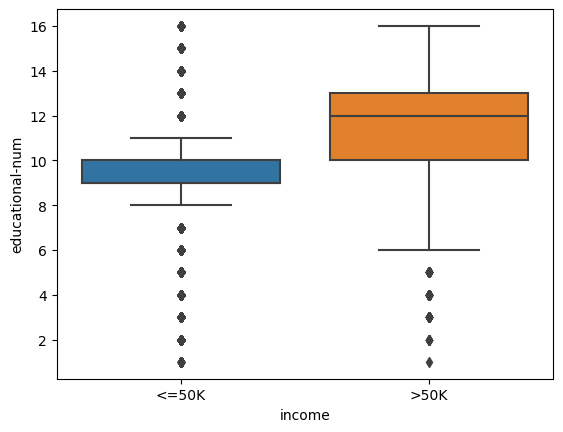

In [38]:
seaborn.boxplot(dataset, x = 'income', y = 'educational-num')

<Axes: xlabel='income', ylabel='educational-num'>

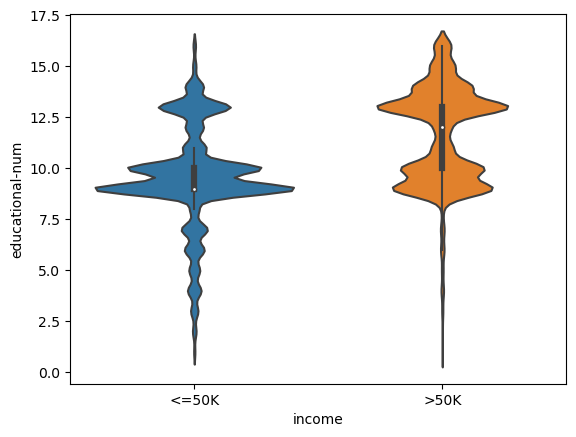

In [39]:
seaborn.violinplot(dataset, x = 'income', y = 'educational-num')

## Gender by level of education

<Axes: xlabel='educational-num', ylabel='Count'>

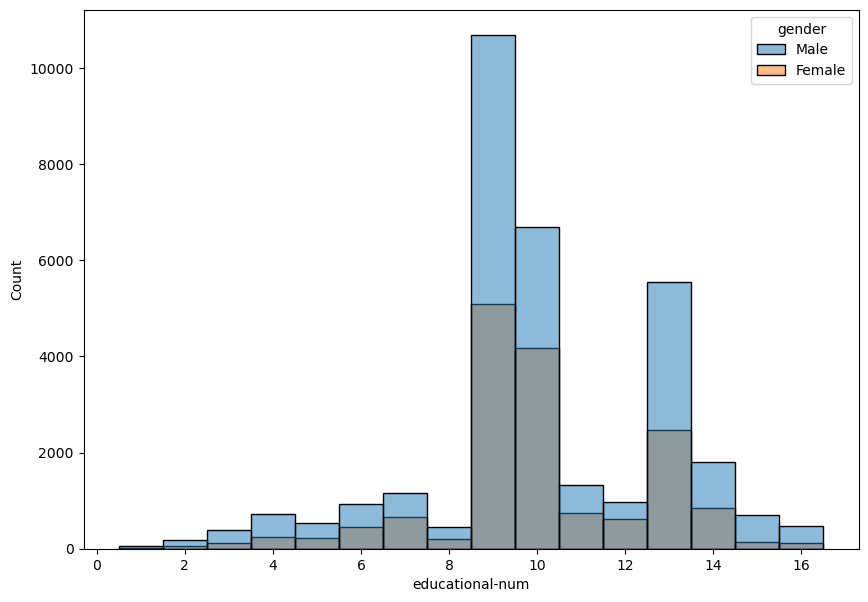

In [40]:
plt.figure(figsize = (10, 7))
seaborn.histplot(data = dataset[['educational-num', 'gender']], x = 'educational-num', hue = 'gender', discrete = True)

## Income by gender

<Axes: xlabel='gender', ylabel='Count'>

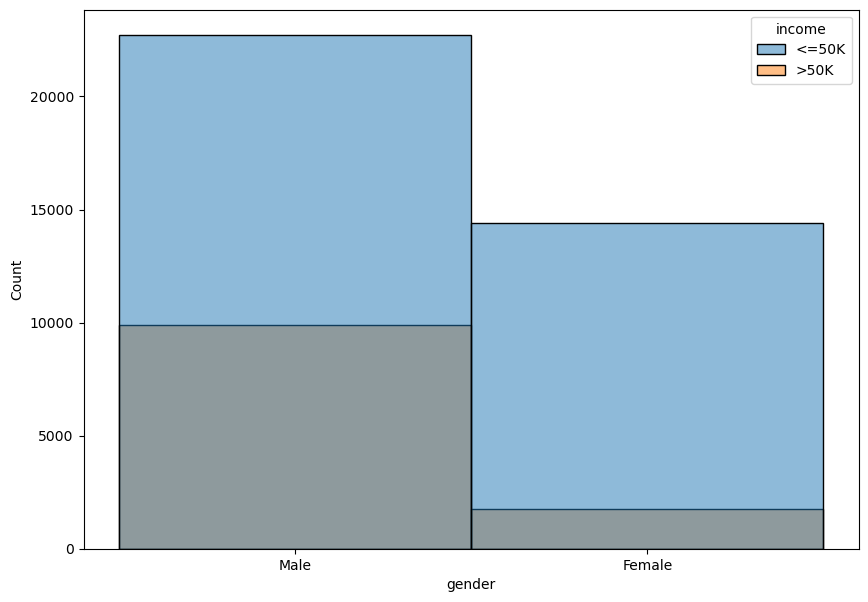

In [41]:
plt.figure(figsize = (10, 7))
seaborn.histplot(data = dataset[['gender', 'income']], x = 'gender', hue = 'income', discrete = True)

## Income by race

<Axes: xlabel='race', ylabel='Count'>

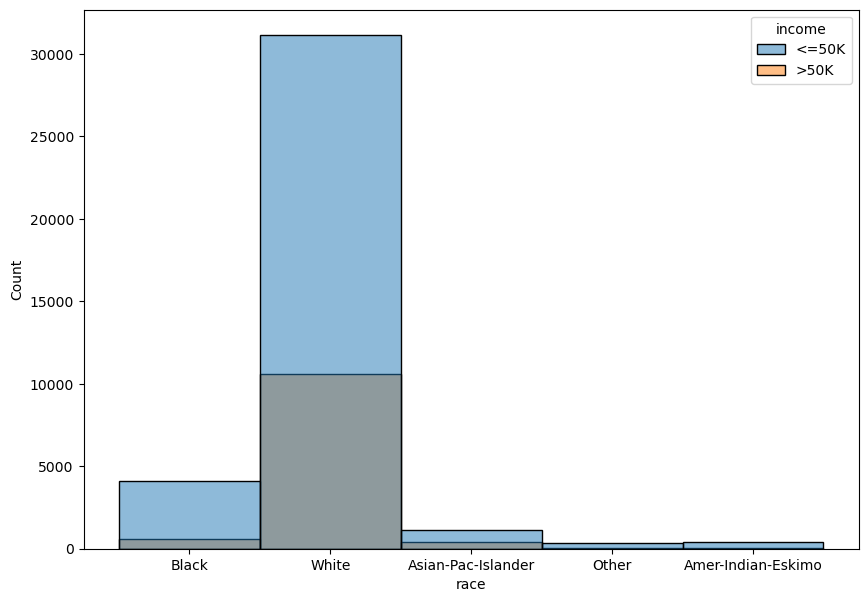

In [42]:
plt.figure(figsize = (10, 7))
seaborn.histplot(data = dataset[['race', 'income']], x = 'race', hue = 'income', discrete = True)

## Income by occupation

<Axes: xlabel='occupation', ylabel='Count'>

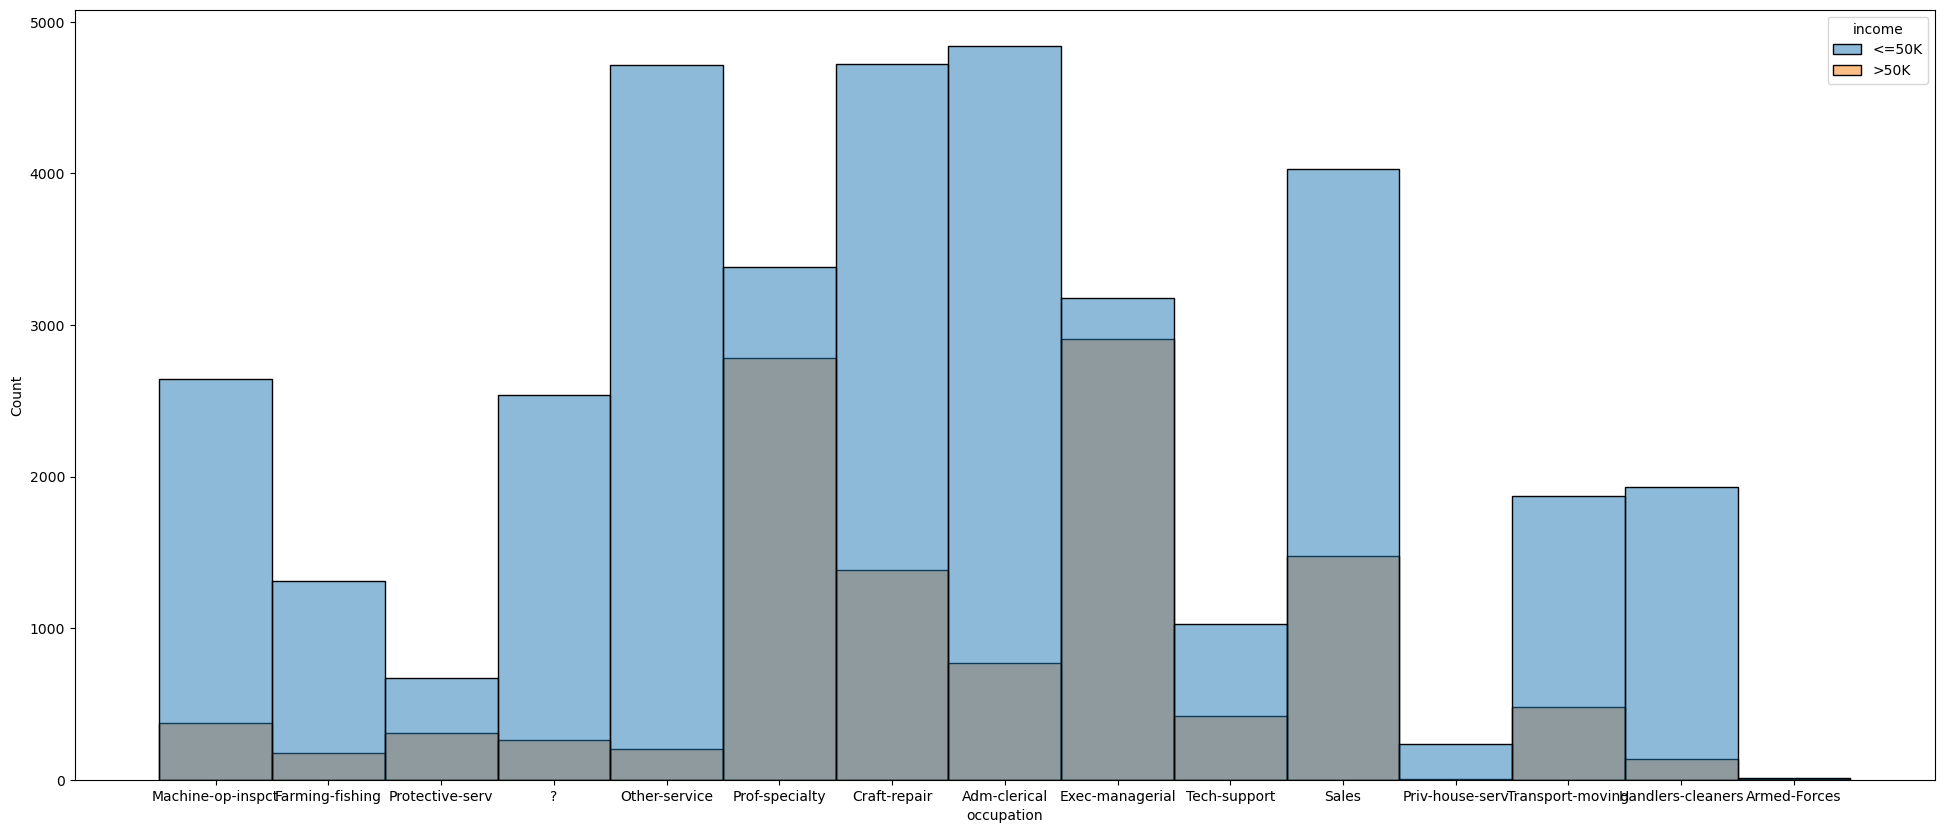

In [43]:
plt.figure(figsize = (24, 10))
seaborn.histplot(data = dataset[['occupation', 'income']], x = 'occupation', hue = 'income', discrete = True)

## Income by work class

<Axes: xlabel='workclass', ylabel='Count'>

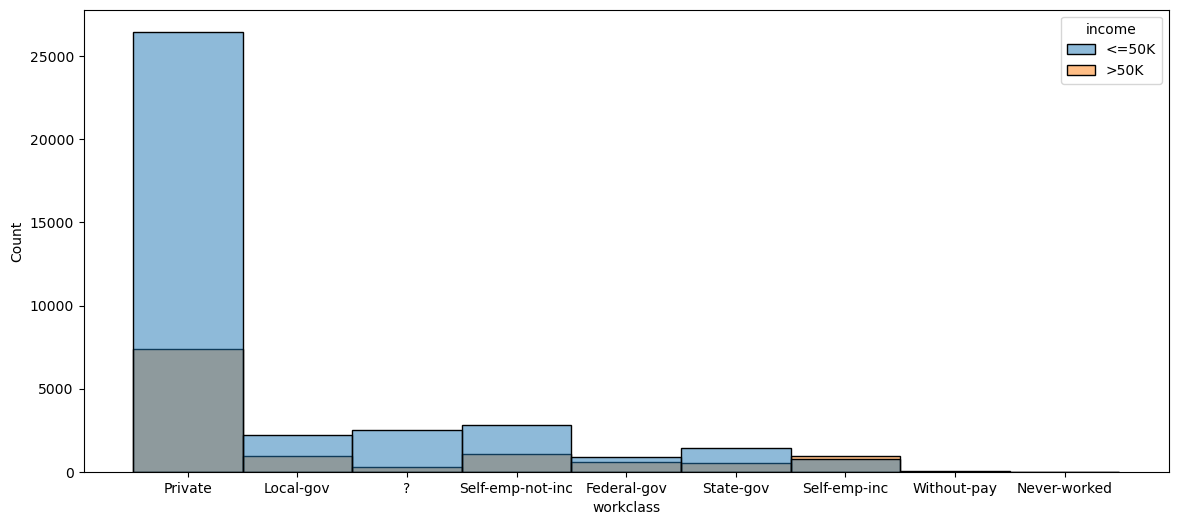

In [44]:
plt.figure(figsize = (14, 6))
seaborn.histplot(data = dataset[['workclass', 'income']], x = 'workclass', hue = 'income', discrete = True)

## Income by work hours

<Axes: xlabel='hours-per-week', ylabel='Count'>

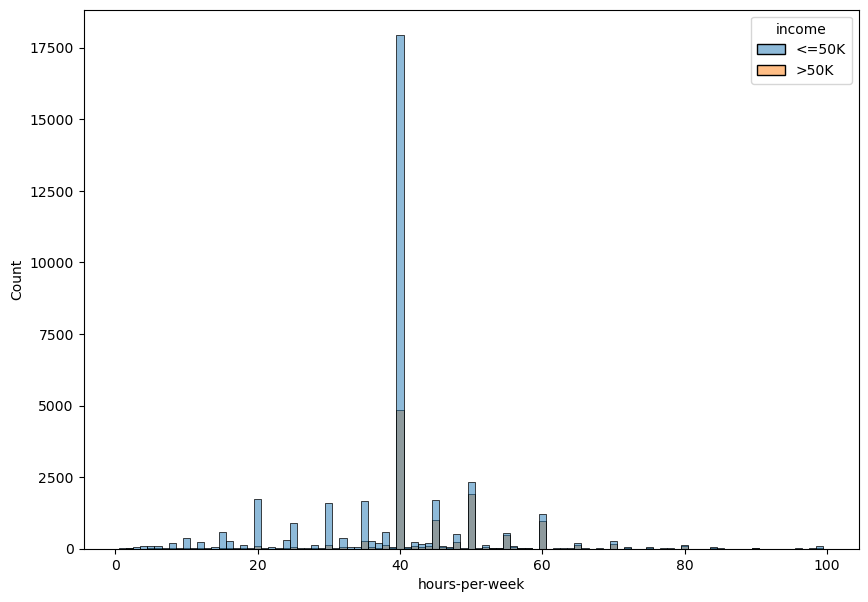

In [45]:
plt.figure(figsize = (10, 7))
seaborn.histplot(data = dataset[['hours-per-week', 'income']], x = 'hours-per-week', hue = 'income', discrete = True)

## Work hours by gender

<Axes: xlabel='hours-per-week', ylabel='gender'>

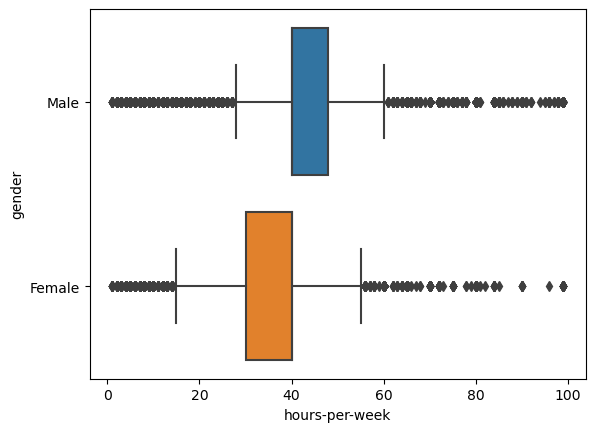

In [46]:
seaborn.boxplot(dataset, x = 'hours-per-week', y = 'gender')

<Axes: xlabel='hours-per-week', ylabel='gender'>

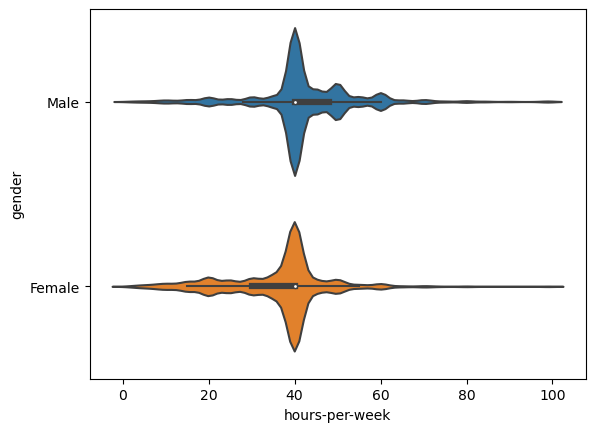

In [47]:
seaborn.violinplot(dataset, x = 'hours-per-week', y = 'gender')

## Work hours by marital status

<Axes: xlabel='hours-per-week', ylabel='marital-status'>

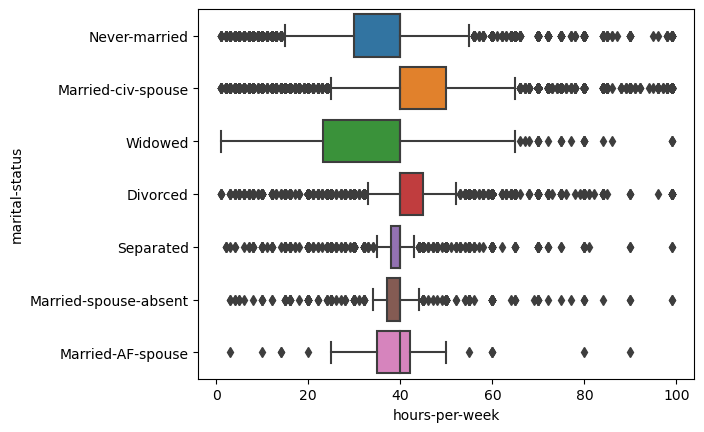

In [48]:
seaborn.boxplot(dataset, x = 'hours-per-week', y = 'marital-status')

<Axes: xlabel='hours-per-week', ylabel='marital-status'>

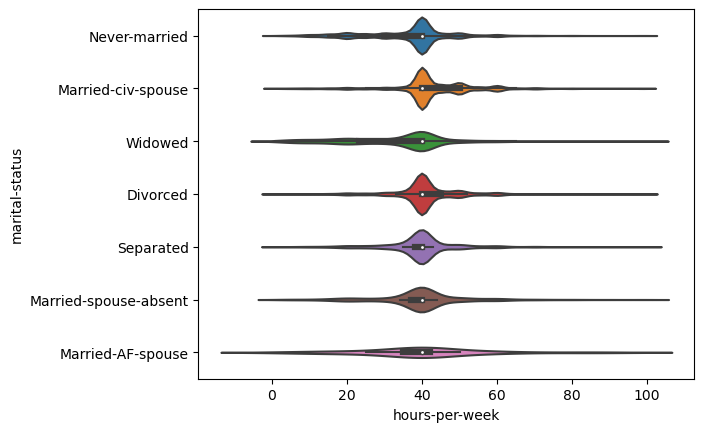

In [49]:
seaborn.violinplot(dataset, x = 'hours-per-week', y = 'marital-status')

## Marital status by age

<Axes: xlabel='marital-status', ylabel='age'>

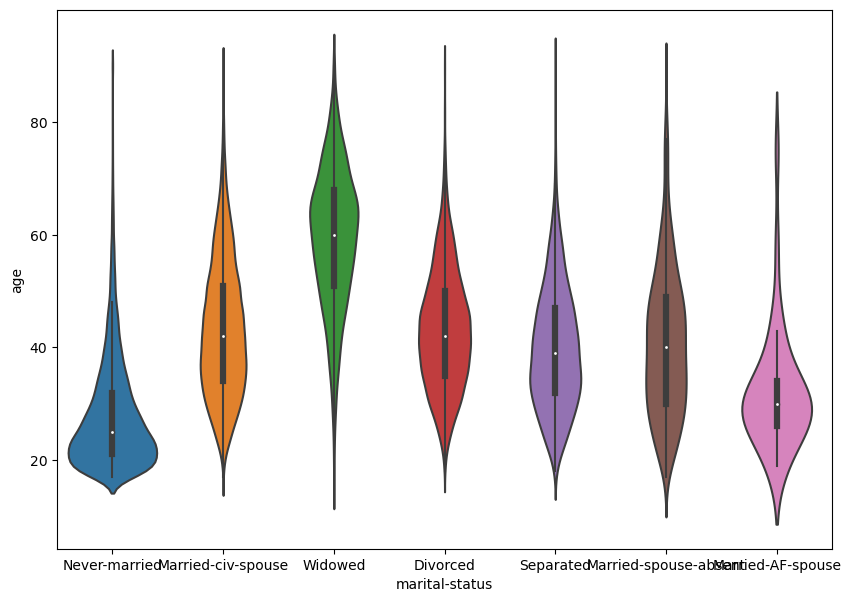

In [50]:
plt.figure(figsize = (10, 7))
seaborn.violinplot(dataset, x = 'marital-status', y = 'age')

## Race by age

<Axes: xlabel='race', ylabel='age'>

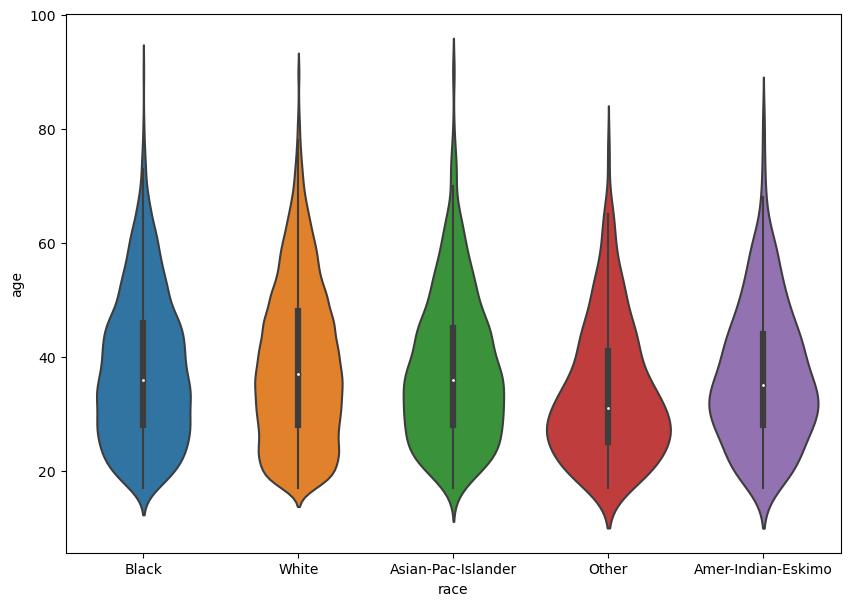

In [51]:
plt.figure(figsize = (10, 7))
seaborn.violinplot(dataset, x = 'race', y = 'age')

## Education type by work hours

<Axes: xlabel='education', ylabel='hours-per-week'>

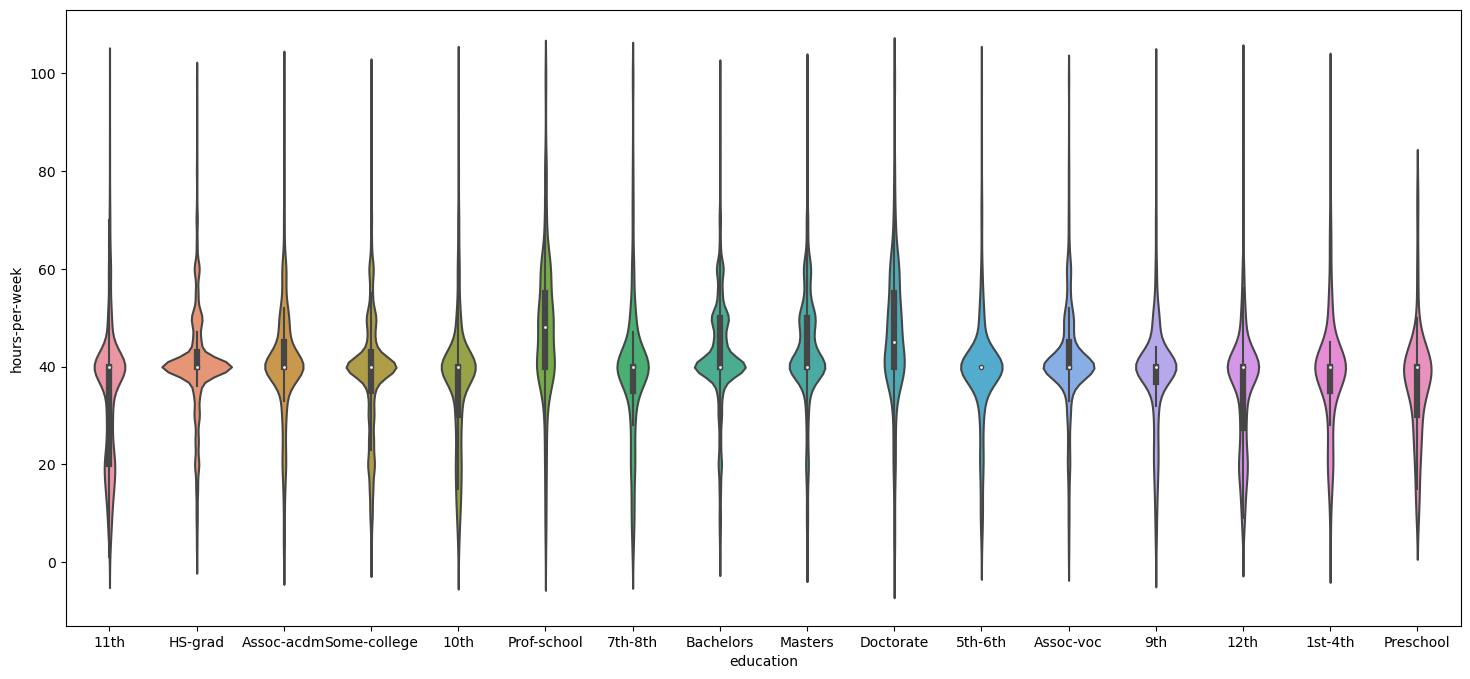

In [52]:
plt.figure(figsize = (18, 8))
seaborn.violinplot(dataset, x = 'education', y = 'hours-per-week')

## Income by level of education and work hours

<Axes: xlabel='educational-num', ylabel='hours-per-week'>

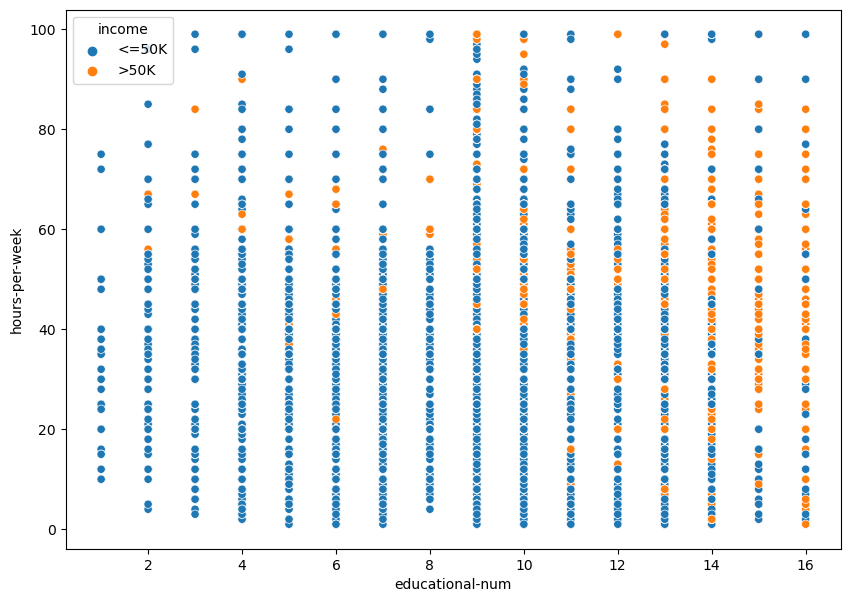

In [53]:
plt.figure(figsize = (10, 7))
seaborn.scatterplot(dataset, x = 'educational-num', y = 'hours-per-week', hue = 'income')

## Gender by level of education and work hours

<Axes: xlabel='educational-num', ylabel='hours-per-week'>

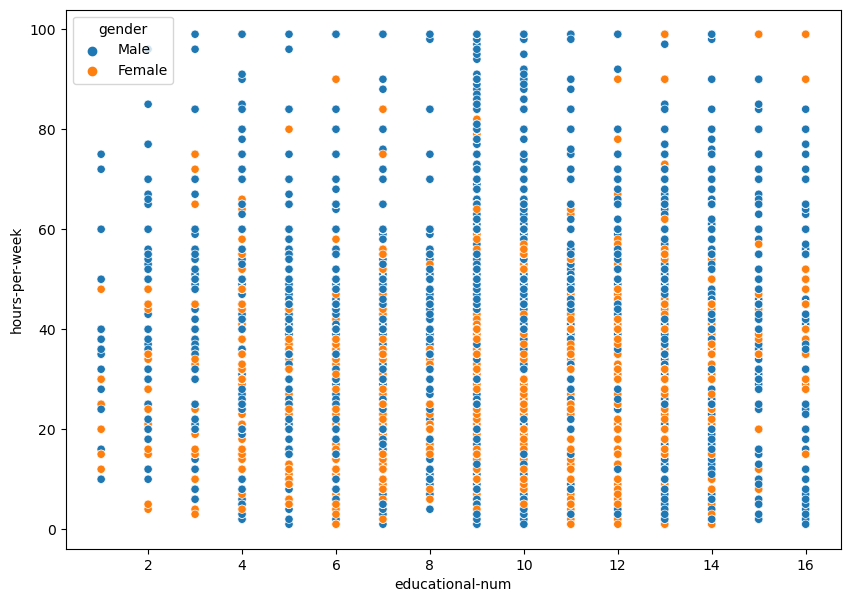

In [54]:
plt.figure(figsize = (10, 7))
seaborn.scatterplot(dataset, x ='educational-num', y = 'hours-per-week', hue = 'gender')

# Preprocessing

## Dropping unnecessary features

In [4]:
dataset_processed = dataset.drop(
    columns = ['fnlwgt',
               'education',
               'race',
               'native-country'])

dataset_processed

,age,workclass,educational-num,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,>50K
4,18,?,10,Never-married,?,Own-child,Female,0,0,30,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,<=50K
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,>50K
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,<=50K
48840,22,Private,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,<=50K


## Filling the missing values

In [5]:
work_class_mode = dataset['workclass'].mode()[0]
work_class_mode

'Private'

In [6]:
occupation_mode = dataset['occupation'].mode()[0]
occupation_mode

'Prof-specialty'

In [7]:
dataset_processed['workclass'] = dataset_processed['workclass'].replace('?', work_class_mode)
dataset_processed['occupation'] = dataset_processed['occupation'].replace('?', occupation_mode)
dataset_processed

,age,workclass,educational-num,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,>50K
4,18,Private,10,Never-married,Prof-specialty,Own-child,Female,0,0,30,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,<=50K
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,>50K
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,<=50K
48840,22,Private,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,<=50K


## Standardization

In [8]:
dataset_numerical_only = dataset_processed.drop(
    columns = [
        'relationship',
        'gender',
        'marital-status',
        'occupation',
        'workclass',
        'income'
    ])
dataset_numerical_only

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,18,10,0,0,30
...,...,...,...,...,...
48837,27,12,0,0,38
48838,40,9,0,0,40
48839,58,9,0,0,40
48840,22,9,0,0,20


In [9]:
scaler = StandardScaler()
matrix = scaler.fit_transform(dataset_numerical_only)
dataset_standardized = pd.DataFrame(
    matrix, 
    columns = [
        'age',
        'educational-num',
        'capital-gain',
        'capital-loss',
        'hours-per-week'
    ])

dataset_standardized

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,-0.995129,-1.197259,-0.144804,-0.217127,-0.034087
1,-0.046942,-0.419335,-0.144804,-0.217127,0.772930
2,-0.776316,0.747550,-0.144804,-0.217127,-0.034087
3,0.390683,-0.030373,0.886874,-0.217127,-0.034087
4,-1.505691,-0.030373,-0.144804,-0.217127,-0.841104
...,...,...,...,...,...
48837,-0.849254,0.747550,-0.144804,-0.217127,-0.195490
48838,0.098933,-0.419335,-0.144804,-0.217127,-0.034087
48839,1.411808,-0.419335,-0.144804,-0.217127,-0.034087
48840,-1.213941,-0.419335,-0.144804,-0.217127,-1.648120


In [10]:
dataset_standardized.insert(5, 'relationship', dataset_processed['relationship'])
dataset_standardized.insert(6, 'gender', dataset_processed['gender'])
dataset_standardized.insert(7, 'marital-status', dataset_processed['marital-status'])
dataset_standardized.insert(8, 'occupation', dataset_processed['occupation'])
dataset_standardized.insert(9, 'workclass', dataset_processed['workclass'])
dataset_standardized.insert(10, 'income', dataset_processed['income'])
dataset_standardized

,age,educational-num,capital-gain,capital-loss,hours-per-week,relationship,gender,marital-status,occupation,workclass,income
0,-0.995129,-1.197259,-0.144804,-0.217127,-0.034087,Own-child,Male,Never-married,Machine-op-inspct,Private,<=50K
1,-0.046942,-0.419335,-0.144804,-0.217127,0.772930,Husband,Male,Married-civ-spouse,Farming-fishing,Private,<=50K
2,-0.776316,0.747550,-0.144804,-0.217127,-0.034087,Husband,Male,Married-civ-spouse,Protective-serv,Local-gov,>50K
3,0.390683,-0.030373,0.886874,-0.217127,-0.034087,Husband,Male,Married-civ-spouse,Machine-op-inspct,Private,>50K
4,-1.505691,-0.030373,-0.144804,-0.217127,-0.841104,Own-child,Female,Never-married,Prof-specialty,Private,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.849254,0.747550,-0.144804,-0.217127,-0.195490,Wife,Female,Married-civ-spouse,Tech-support,Private,<=50K
48838,0.098933,-0.419335,-0.144804,-0.217127,-0.034087,Husband,Male,Married-civ-spouse,Machine-op-inspct,Private,>50K
48839,1.411808,-0.419335,-0.144804,-0.217127,-0.034087,Unmarried,Female,Widowed,Adm-clerical,Private,<=50K
48840,-1.213941,-0.419335,-0.144804,-0.217127,-1.648120,Own-child,Male,Never-married,Adm-clerical,Private,<=50K


## Non-numeric features encoding

In [11]:
label_encoder = LabelEncoder()
dataset_standardized['income'] = label_encoder.fit_transform(dataset_standardized['income'])
dataset_standardized

,age,educational-num,capital-gain,capital-loss,hours-per-week,relationship,gender,marital-status,occupation,workclass,income
0,-0.995129,-1.197259,-0.144804,-0.217127,-0.034087,Own-child,Male,Never-married,Machine-op-inspct,Private,0
1,-0.046942,-0.419335,-0.144804,-0.217127,0.772930,Husband,Male,Married-civ-spouse,Farming-fishing,Private,0
2,-0.776316,0.747550,-0.144804,-0.217127,-0.034087,Husband,Male,Married-civ-spouse,Protective-serv,Local-gov,1
3,0.390683,-0.030373,0.886874,-0.217127,-0.034087,Husband,Male,Married-civ-spouse,Machine-op-inspct,Private,1
4,-1.505691,-0.030373,-0.144804,-0.217127,-0.841104,Own-child,Female,Never-married,Prof-specialty,Private,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.849254,0.747550,-0.144804,-0.217127,-0.195490,Wife,Female,Married-civ-spouse,Tech-support,Private,0
48838,0.098933,-0.419335,-0.144804,-0.217127,-0.034087,Husband,Male,Married-civ-spouse,Machine-op-inspct,Private,1
48839,1.411808,-0.419335,-0.144804,-0.217127,-0.034087,Unmarried,Female,Widowed,Adm-clerical,Private,0
48840,-1.213941,-0.419335,-0.144804,-0.217127,-1.648120,Own-child,Male,Never-married,Adm-clerical,Private,0


In [12]:
dataset_encoded = pd.get_dummies(dataset_standardized)
print(dataset_encoded.columns.values)
dataset_encoded.replace({False: 0, True: 1}, inplace = True)
dataset_encoded

['age' 'educational-num' 'capital-gain' 'capital-loss' 'hours-per-week'
 'income' 'relationship_Husband' 'relationship_Not-in-family'
 'relationship_Other-relative' 'relationship_Own-child'
 'relationship_Unmarried' 'relationship_Wife' 'gender_Female'
 'gender_Male' 'marital-status_Divorced'
 'marital-status_Married-AF-spouse' 'marital-status_Married-civ-spouse'
 'marital-status_Married-spouse-absent' 'marital-status_Never-married'
 'marital-status_Separated' 'marital-status_Widowed'
 'occupation_Adm-clerical' 'occupation_Armed-Forces'
 'occupation_Craft-repair' 'occupation_Exec-managerial'
 'occupation_Farming-fishing' 'occupation_Handlers-cleaners'
 'occupation_Machine-op-inspct' 'occupation_Other-service'
 'occupation_Priv-house-serv' 'occupation_Prof-specialty'
 'occupation_Protective-serv' 'occupation_Sales' 'occupation_Tech-support'
 'occupation_Transport-moving' 'workclass_Federal-gov'
 'workclass_Local-gov' 'workclass_Never-worked' 'workclass_Private'
 'workclass_Self-emp-inc' 

,age,educational-num,capital-gain,capital-loss,hours-per-week,income,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,...,occupation_Tech-support,occupation_Transport-moving,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,-0.995129,-1.197259,-0.144804,-0.217127,-0.034087,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,-0.046942,-0.419335,-0.144804,-0.217127,0.772930,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.776316,0.747550,-0.144804,-0.217127,-0.034087,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.390683,-0.030373,0.886874,-0.217127,-0.034087,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-1.505691,-0.030373,-0.144804,-0.217127,-0.841104,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.849254,0.747550,-0.144804,-0.217127,-0.195490,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
48838,0.098933,-0.419335,-0.144804,-0.217127,-0.034087,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
48839,1.411808,-0.419335,-0.144804,-0.217127,-0.034087,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
48840,-1.213941,-0.419335,-0.144804,-0.217127,-1.648120,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


## Correlation matrix

<Axes: >

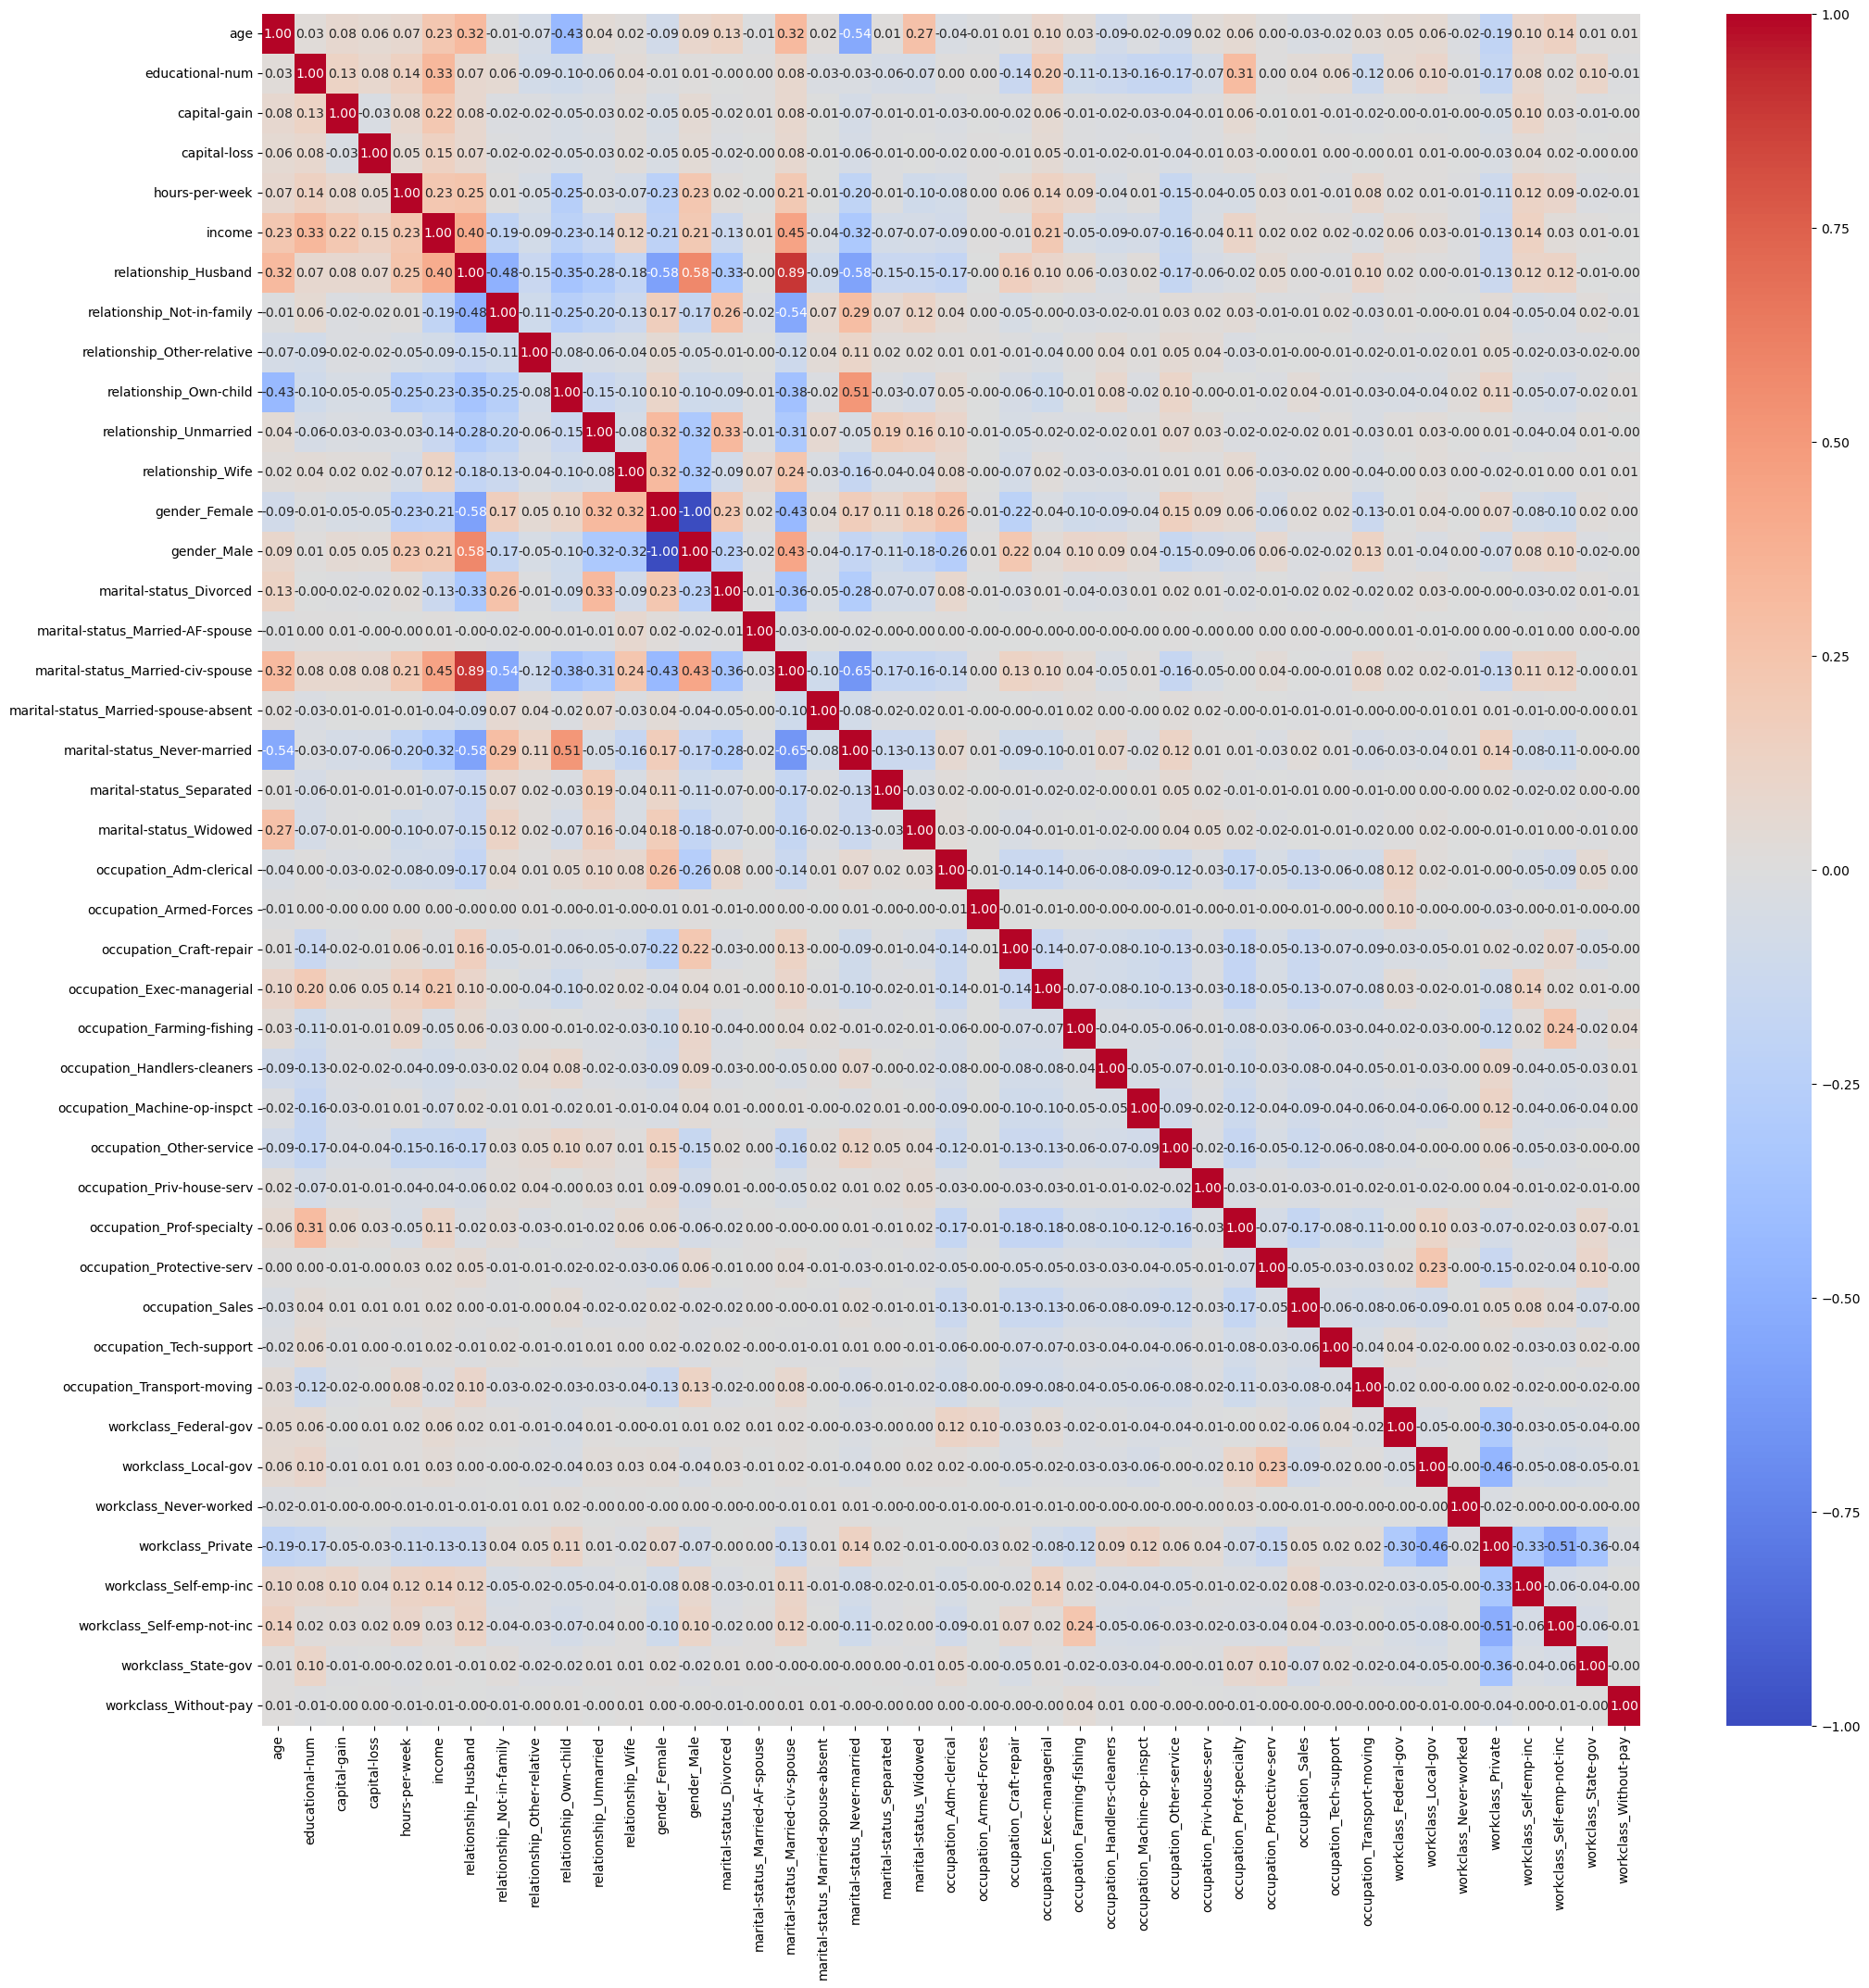

In [42]:
plt.figure(figsize = (24, 24))
seaborn.heatmap(dataset_encoded.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')

# Classification

##### Notice: classes are not balanced

<Axes: xlabel='income', ylabel='Count'>

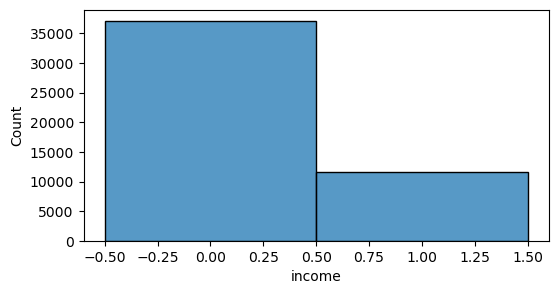

In [43]:
plt.figure(figsize = (6, 3))
seaborn.histplot(dataset_encoded['income'], discrete = True)

In [13]:
x = dataset_encoded.drop(columns = 'income')
y = dataset_encoded['income']

In [14]:
x

,age,educational-num,capital-gain,capital-loss,hours-per-week,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,...,occupation_Tech-support,occupation_Transport-moving,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,-0.995129,-1.197259,-0.144804,-0.217127,-0.034087,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,-0.046942,-0.419335,-0.144804,-0.217127,0.772930,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.776316,0.747550,-0.144804,-0.217127,-0.034087,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.390683,-0.030373,0.886874,-0.217127,-0.034087,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-1.505691,-0.030373,-0.144804,-0.217127,-0.841104,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.849254,0.747550,-0.144804,-0.217127,-0.195490,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
48838,0.098933,-0.419335,-0.144804,-0.217127,-0.034087,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
48839,1.411808,-0.419335,-0.144804,-0.217127,-0.034087,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
48840,-1.213941,-0.419335,-0.144804,-0.217127,-1.648120,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [15]:
y

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int32

## Dataset split

In [35]:
x_train_, x_test, y_train_, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42, shuffle = True)
x_train, x_validation, y_train, y_validation = train_test_split(x_train_, y_train_, test_size = 0.1, random_state = 42)         

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_validation_categorical = to_categorical(y_validation)

print(f'x train: {x_train.shape}')
print(f'y train: {y_train.shape}')
print(f'y train categorical: {y_train_categorical.shape}')
print()
print(f'x test: {x_test.shape}')
print(f'y test: {y_test.shape}')
print(f'y test categorical: {y_test_categorical.shape}')
print()
print(f'x validation: {x_validation.shape}')
print(f'y validation: {y_validation.shape}')
print(f'y validation categorical: {y_validation_categorical.shape}')

x train: (32967, 42)
y train: (32967,)
y train categorical: (32967, 2)

x test: (12211, 42)
y test: (12211,)
y test categorical: (12211, 2)

x validation: (3664, 42)
y validation: (3664,)
y validation categorical: (3664, 2)


In [17]:
from sklearn.metrics import confusion_matrix

def show_confusion_matrix(labels_test, labels_predicted):
    plt.figure(figsize = (10,7))
    seaborn.heatmap(
        confusion_matrix(labels_test, labels_predicted),
        annot = True, fmt = 'd')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

## K-nearest neighbors

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      9354
           1       0.73      0.58      0.65      2857

    accuracy                           0.85     12211
   macro avg       0.80      0.76      0.78     12211
weighted avg       0.84      0.85      0.85     12211



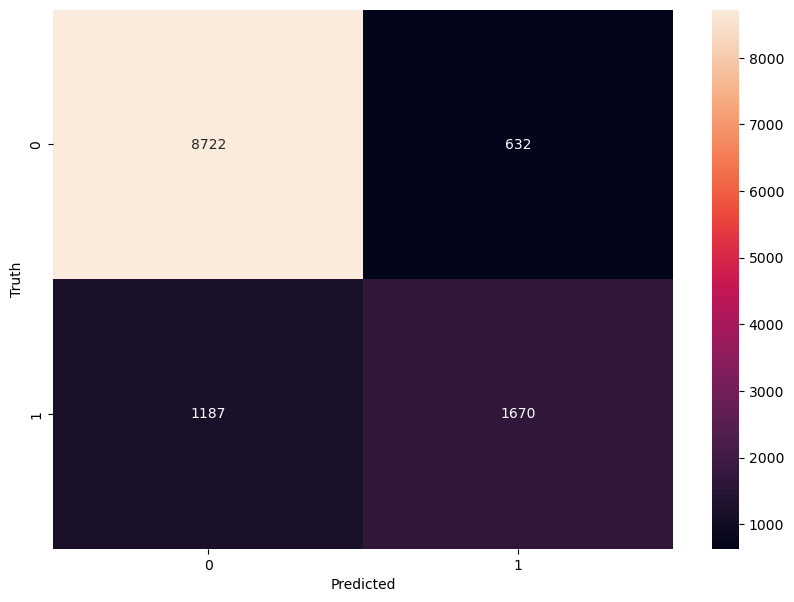

In [18]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(x_train, y_train)
y_predicted_knn = knn.predict(x_test)
print(classification_report(y_test, y_predicted_knn))
show_confusion_matrix(y_test, y_predicted_knn)

## Logistic regression

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      9354
           1       0.74      0.61      0.67      2857

    accuracy                           0.86     12211
   macro avg       0.81      0.77      0.79     12211
weighted avg       0.85      0.86      0.85     12211



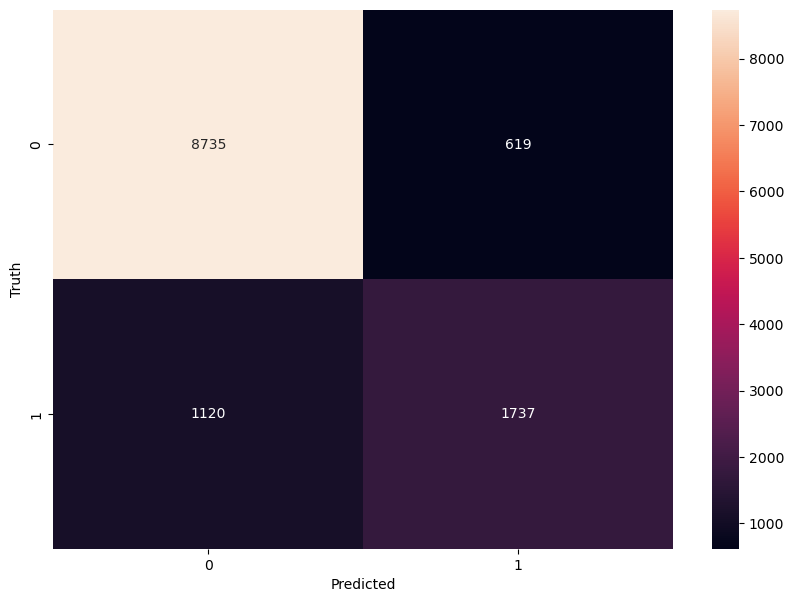

In [53]:
log_reg = LogisticRegression(solver = 'newton-cg')
log_reg.fit(x_train, y_train)
y_predicted_log_reg = log_reg.predict(x_test)
print(classification_report(y_test, y_predicted_log_reg))
show_confusion_matrix(y_test, y_predicted_log_reg)

## Decision tree

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      9354
           1       0.63      0.62      0.62      2857

    accuracy                           0.83     12211
   macro avg       0.76      0.75      0.76     12211
weighted avg       0.82      0.83      0.83     12211



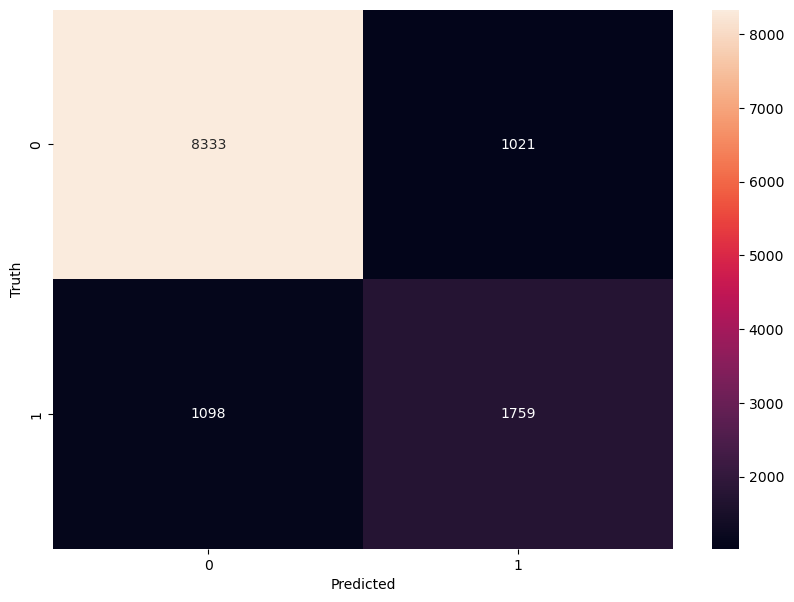

In [50]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_predicted_tree = tree.predict(x_test)
print(classification_report(y_test, y_predicted_tree))
show_confusion_matrix(y_test, y_predicted_tree)

## Random forest

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      9354
           1       0.72      0.64      0.67      2857

    accuracy                           0.86     12211
   macro avg       0.80      0.78      0.79     12211
weighted avg       0.85      0.86      0.85     12211



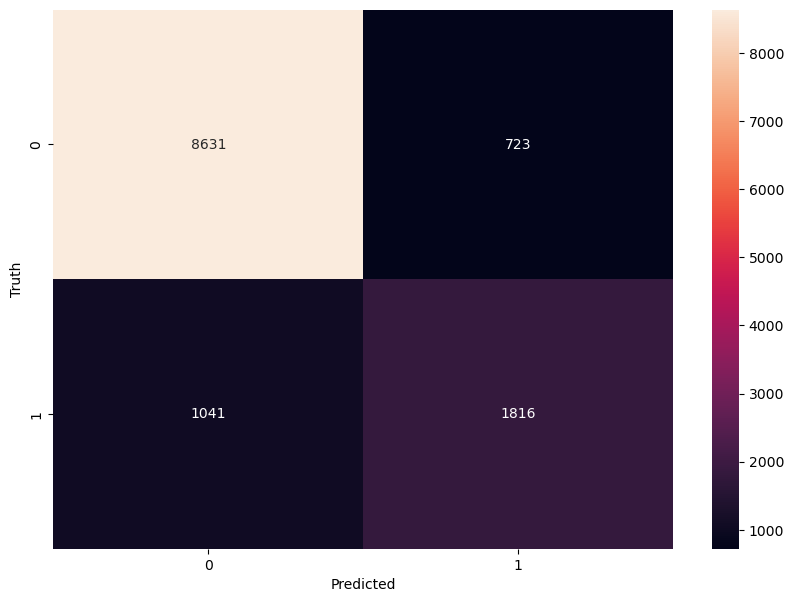

In [54]:
forest = RandomForestClassifier(bootstrap = True, random_state = 42, n_jobs = -1)
forest.fit(x_train, y_train)
y_predicted_forest = forest.predict(x_test)
print(classification_report(y_test, y_predicted_forest))
show_confusion_matrix(y_test, y_predicted_forest)

## Histogram-based gradient boosting

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      9354
           1       0.79      0.67      0.73      2857

    accuracy                           0.88     12211
   macro avg       0.85      0.81      0.83     12211
weighted avg       0.88      0.88      0.88     12211



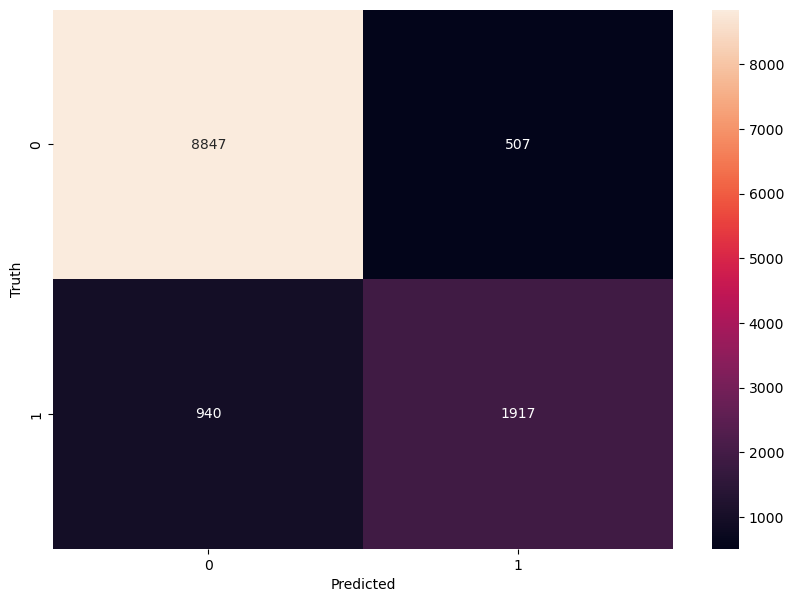

In [55]:
hist_grad_boosting = HistGradientBoostingClassifier(random_state = 42)
hist_grad_boosting.fit(x_train, y_train)
y_predicted_hist_grad_boosting = hist_grad_boosting.predict(x_test)
print(classification_report(y_test, y_predicted_hist_grad_boosting))
show_confusion_matrix(y_test, y_predicted_hist_grad_boosting)

## CatBoost

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Resulting tree count: 97
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      9354
           1       0.81      0.60      0.69      2857

    accuracy                           0.87     12211
   macro avg       0.85      0.78      0.81     12211
weighted avg       0.87      0.87      0.87     12211



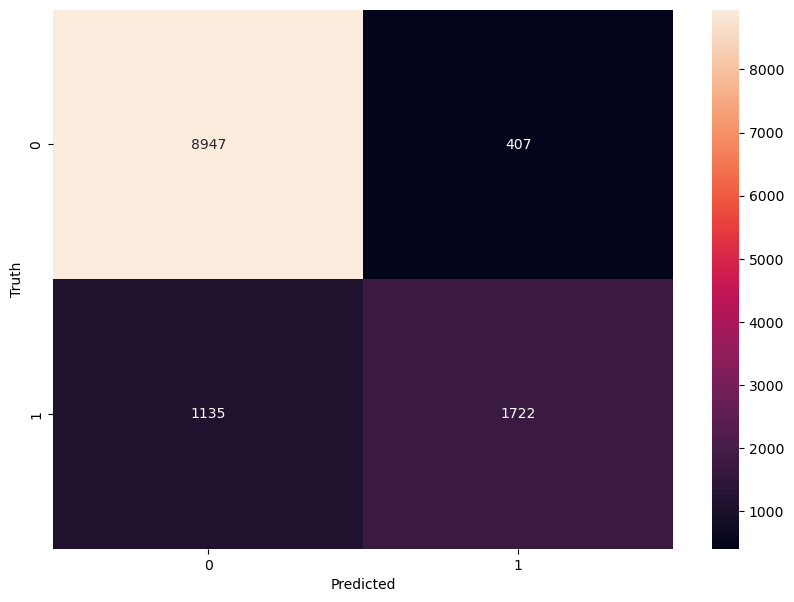

In [56]:
cat_boost = CatBoostClassifier(
    eval_metric = 'Accuracy',
    random_seed = 42,
    od_type = 'Iter',
    od_wait = 20,
    task_type = 'GPU')

cat_boost.fit(x_train, y_train, eval_set = (x_validation, y_validation), logging_level = 'Silent', plot = True)
print(f'Resulting tree count: {cat_boost.tree_count_}')
y_predicted_cat_boost = cat_boost.predict(x_test)
print(classification_report(y_test, y_predicted_cat_boost))
show_confusion_matrix(y_test, y_predicted_cat_boost)

## Perceptron

In [19]:
def show_training_history(history, num_of_epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(num_of_epochs)

    plt.figure(figsize = (8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label = 'Training accuracy')
    plt.plot(epochs_range, val_acc, label = 'Validation accuracy')
    plt.legend(loc = 'lower right')
    plt.title('Training and validation accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label = 'Training loss')
    plt.plot(epochs_range, val_loss, label = 'Validation loss')
    plt.legend(loc = 'upper right')
    plt.title('Training and validation loss')
    plt.show()   

In [24]:
perceptron = Sequential([
    Dense(20, activation = 'relu', input_dim = x_train.shape[1]),
    Dense(20, activation = 'relu'),
    Dense(20, activation = 'relu'),
    Dropout(0.5),
    Dense(y_train_categorical.shape[1], activation = 'sigmoid')
])

perceptron.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(perceptron.summary())

epochs = 100
early_stopping_monitor_perceptron = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 1e-4, 
    patience = 3,
    verbose = 1,
    mode = 'auto',
    restore_best_weights = False)

perceptron_history = perceptron.fit(
    x_train, 
    y_train_categorical, 
    validation_data = (x_validation, y_validation_categorical),
    batch_size = 32,
    callbacks = [early_stopping_monitor_perceptron],
    epochs = epochs)

loss, accuracy = perceptron.evaluate(x_test, y_test_categorical)  

print('---------')
print(f'Accuracy: {accuracy}, loss: {loss}')
print('---------')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 20)                860       
                                                                 
 dense_8 (Dense)             (None, 20)                420       
                                                                 
 dense_9 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 2)                 42        
                                                                 
Total params: 1,742
Trainable params: 1,742
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1031/1031 [========================

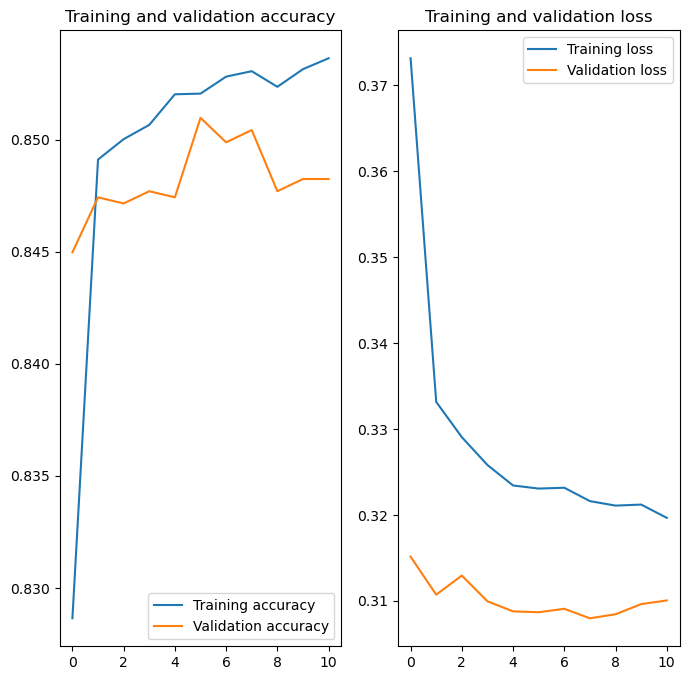

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      9354
           1       0.77      0.59      0.67      2857

    accuracy                           0.86     12211
   macro avg       0.83      0.77      0.79     12211
weighted avg       0.86      0.86      0.86     12211



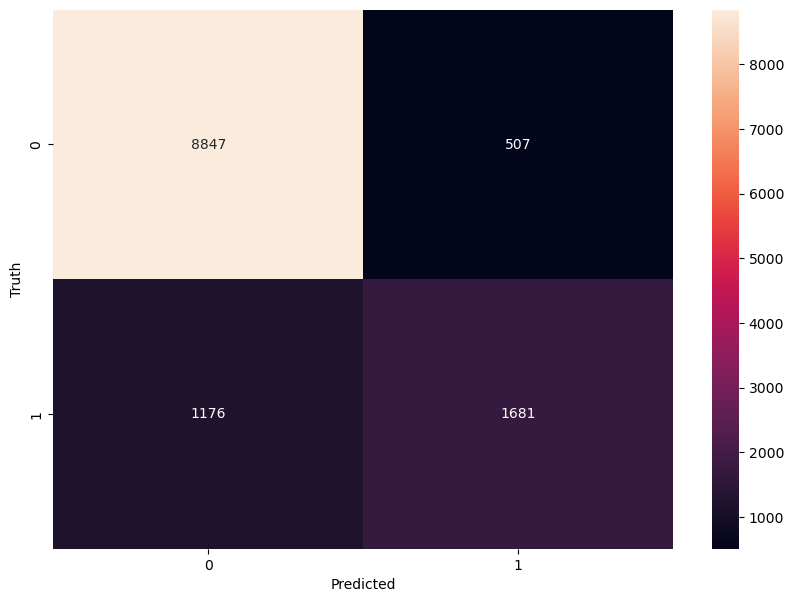

In [25]:
stopped_epoch = early_stopping_monitor_perceptron.stopped_epoch
show_training_history(perceptron_history, epochs if (stopped_epoch == 0) else stopped_epoch + 1)
y_predicted_perceptron = np.argmax(perceptron.predict(x_test), axis = 1)
print(classification_report(y_test, y_predicted_perceptron))
show_confusion_matrix(y_test, y_predicted_perceptron)

## Perceptron (but classes are splitted more equally)

In [26]:
higher_income_class_count = dataset_encoded[dataset_encoded['income'] == 1].shape[0]
higher_income_class_count

11687

In [27]:
temp = dataset_encoded.groupby('income', group_keys = False).apply(lambda x: x.sample(n = higher_income_class_count))
a = temp[temp['income'] == 0]
b = temp[temp['income'] == 1]
c = pd.concat([a, b])
c

,age,educational-num,capital-gain,capital-loss,hours-per-week,income,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,...,occupation_Tech-support,occupation_Transport-moving,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
35571,-1.286879,-0.419335,-0.144804,-0.217127,-0.437595,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1310,1.411808,1.136512,-0.144804,-0.217127,-0.034087,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
46838,-1.359816,0.747550,-0.144804,-0.217127,-0.841104,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
26653,-1.068066,-0.030373,-0.144804,-0.217127,-0.841104,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6566,0.463621,1.136512,-0.144804,-0.217127,-0.034087,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47869,-0.776316,1.136512,-0.144804,-0.217127,0.772930,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
42043,1.557683,-0.030373,-0.144804,-0.217127,-0.034087,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24022,-1.432754,-2.364144,-0.144804,-0.217127,1.579946,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
7117,-0.119879,1.136512,-0.144804,-0.217127,0.369421,1,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


<Axes: xlabel='age', ylabel='Count'>

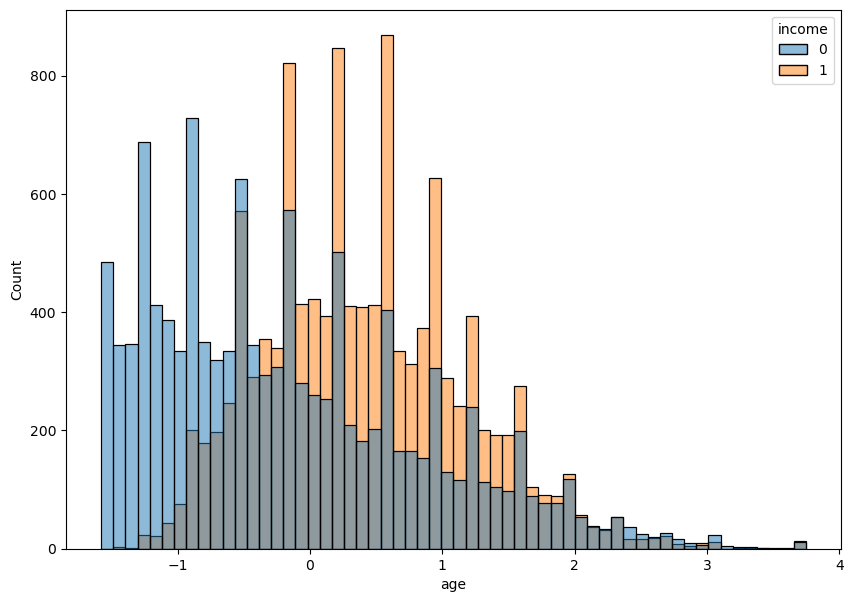

In [29]:
plt.figure(figsize = (10, 7))
seaborn.histplot(data = c[['age', 'income']], x = 'age', hue = 'income')

In [31]:
x_equal = c.drop(columns = 'income')
y_equal = c['income']

In [32]:
x_equal

,age,educational-num,capital-gain,capital-loss,hours-per-week,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,...,occupation_Tech-support,occupation_Transport-moving,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
35571,-1.286879,-0.419335,-0.144804,-0.217127,-0.437595,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1310,1.411808,1.136512,-0.144804,-0.217127,-0.034087,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
46838,-1.359816,0.747550,-0.144804,-0.217127,-0.841104,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
26653,-1.068066,-0.030373,-0.144804,-0.217127,-0.841104,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6566,0.463621,1.136512,-0.144804,-0.217127,-0.034087,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47869,-0.776316,1.136512,-0.144804,-0.217127,0.772930,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
42043,1.557683,-0.030373,-0.144804,-0.217127,-0.034087,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24022,-1.432754,-2.364144,-0.144804,-0.217127,1.579946,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7117,-0.119879,1.136512,-0.144804,-0.217127,0.369421,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [33]:
y_equal

35571    0
1310     0
46838    0
26653    0
6566     0
        ..
47869    1
42043    1
24022    1
7117     1
17482    1
Name: income, Length: 23374, dtype: int32

In [36]:
x_train_equal_, x_test_equal, y_train_equal_, y_test_equal = train_test_split(x_equal, y_equal, test_size = 0.25, random_state = 42, shuffle = True)
x_train_equal, x_validation_equal, y_train_equal, y_validation_equal = train_test_split(x_train_equal_, y_train_equal_, test_size = 0.1, random_state = 42)         

y_train_categorical_equal = to_categorical(y_train_equal)
y_test_categorical_equal = to_categorical(y_test_equal)
y_validation_categorical_equal = to_categorical(y_validation_equal)

print(f'x train: {x_train_equal.shape}')
print(f'y train: {y_train_equal.shape}')
print(f'y train categorical: {y_train_categorical_equal.shape}')
print()
print(f'x test: {x_test_equal.shape}')
print(f'y test: {y_test_equal.shape}')
print(f'y test categorical: {y_test_categorical_equal.shape}')
print()
print(f'x validation: {x_validation_equal.shape}')
print(f'y validation: {y_validation_equal.shape}')
print(f'y validation categorical: {y_validation_categorical_equal.shape}')

x train: (15777, 42)
y train: (15777,)
y train categorical: (15777, 2)

x test: (5844, 42)
y test: (5844,)
y test categorical: (5844, 2)

x validation: (1753, 42)
y validation: (1753,)
y validation categorical: (1753, 2)


In [43]:
perceptron_2 = Sequential([
    Dense(20, activation = 'relu', input_dim = x_train_equal.shape[1]),
    Dense(20, activation = 'relu'),
    Dense(20, activation = 'relu'),
    Dropout(0.5),
    Dense(y_train_categorical_equal.shape[1], activation = 'sigmoid')
])

perceptron_2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(perceptron_2.summary())

epochs = 100
early_stopping_monitor_perceptron_2 = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 1e-4, 
    patience = 3,
    verbose = 1,
    mode = 'auto',
    restore_best_weights = False)

perceptron_2_history = perceptron_2.fit(
    x_train_equal, 
    y_train_categorical_equal, 
    validation_data = (x_validation_equal, y_validation_categorical_equal),
    batch_size = 32,
    callbacks = [early_stopping_monitor_perceptron_2],
    epochs = epochs)

loss, accuracy = perceptron_2.evaluate(x_test_equal, y_test_categorical_equal)  

print('---------')
print(f'Accuracy: {accuracy}, loss: {loss}')
print('---------')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 20)                860       
                                                                 
 dense_20 (Dense)            (None, 20)                420       
                                                                 
 dense_21 (Dense)            (None, 20)                420       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_22 (Dense)            (None, 2)                 42        
                                                                 
Total params: 1,742
Trainable params: 1,742
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
494/494 [==========================

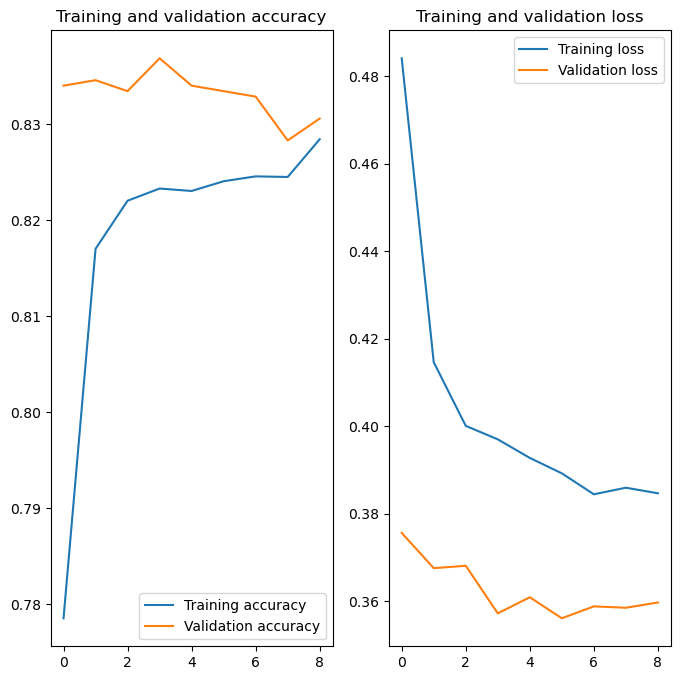

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      2926
           1       0.80      0.89      0.84      2918

    accuracy                           0.84      5844
   macro avg       0.84      0.84      0.84      5844
weighted avg       0.84      0.84      0.84      5844



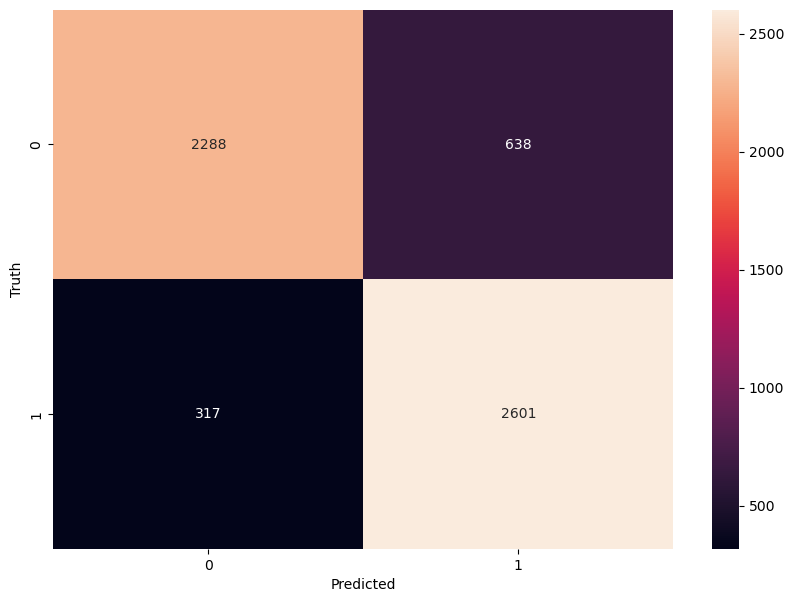

In [44]:
stopped_epoch = early_stopping_monitor_perceptron_2.stopped_epoch
show_training_history(perceptron_2_history, epochs if (stopped_epoch == 0) else stopped_epoch + 1)
y_predicted_perceptron_2 = np.argmax(perceptron_2.predict(x_test_equal), axis = 1)
print(classification_report(y_test_equal, y_predicted_perceptron_2))
show_confusion_matrix(y_test_equal, y_predicted_perceptron_2)

              precision    recall  f1-score   support

           0       0.96      0.77      0.86      9354
           1       0.54      0.90      0.68      2857

    accuracy                           0.80     12211
   macro avg       0.75      0.83      0.77     12211
weighted avg       0.86      0.80      0.81     12211



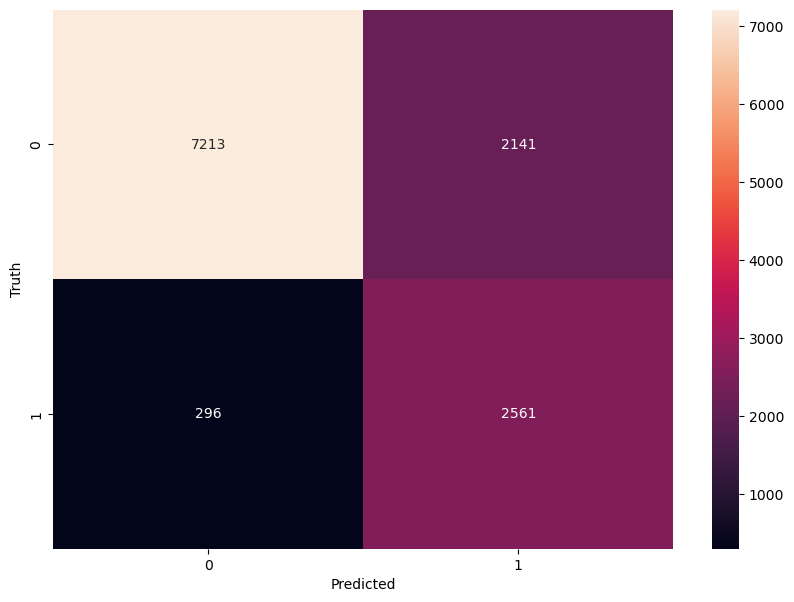

In [45]:
y_predicted_perceptron_2 = np.argmax(perceptron_2.predict(x_test), axis = 1)
print(classification_report(y_test, y_predicted_perceptron_2))
show_confusion_matrix(y_test, y_predicted_perceptron_2)